In [1]:
import re
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import numpy as np
import pandas as pd
import regex
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv("IMDB FINAL.csv")
df

Title  Year  Duration  Ratings  Reviews  \
0       Stree 2: Sarkate Ka Aatank  2024       147      7.3    30000   
1                    Devara Part 1  2024       176      6.4    12000   
2                            Ulajh  2024       150      6.4    22000   
3         Auron Mein Kahan Dum Tha  2024       150      7.3    39000   
4                     Dharmaveer 2  2024       130      7.5    10000   
...                            ...   ...       ...      ...      ...   
1233                         Tariq  2024       122      0.0        0   
1234                  Missing Girl  2023       112      6.9      597   
1235                         The Y  2023       110      5.3     2600   
1236   Upacharapoorvam Gunda Jayan  2022       129      5.7      646   
1237  The Rise of Sudarshan Chakra  2023       156      7.8      130   

           Language                                              Genre  \
0             Hindi                                      Comedy Horror   
1            Telugu                  Action Epic Action Drama Thriller   
2             Hindi                                     Drama Thriller   
3             Hindi                         Action Crime Drama Romance   
4     Marathi Hindi                        Biography Documentary Drama   
...             ...                                                ...   
1233          Hindi                              Action Drama Thriller   
1234      Malayalam                                    Horror Thriller   
1235          Hindi  Psychological Horror Psychological Thriller Ho...   
1236      Malayalam                                Comedy Drama Family   
1237          Hindi                                          Biography   

                                                   Plot          Director  \
0     After the events of Stree, the town of Chander...      Amar Kaushik   
1     An epic action saga set against coastal lands,...     Koratala Siva   
2     The journey of a young IFS officer, belonging ...   Sudhanshu Saria   
3     After 20 years in prison, a man reunites with ...     Neeraj Pandey   
4     Explores Anand Dighe's life, tracing his polit...      Pravin Tarde   
...                                                 ...               ...   
1233                        Add a plot in your language      Arun Gopalan   
1234  To create a ghost story to prevent his old bun...     Abdul Rasheed   
1235  The Female Protagonist is a Mute. After her ma...     Girideva Raaj   
1236  Former rowdy jayan is in a mission to conduct ...        Arun Vaiga   
1237  Film The Rise Of Sudarshan Chakra Is Based On ...  Anil Kulchainiya   

                                         Writer  \
0           Niren BhattKrishna D.K.Raj Nidimoru   
1                                 Koratala Siva   
2     Parveez SheikhSudhanshu SariaAtika Chohan   
3                                 Neeraj Pandey   
4                                  Pravin Tarde   
...                                         ...   
1233      Simaab HashmiLalit MaratheRitesh Shah   
1234            Afsal K AzizVishal Vishwanathan   
1235                              Girideva Raaj   
1236                               Rajesh Varma   
1237                           Anil Kulchainiya   

                                                 Actor    Gross  
0          Rajkummar RaoShraddha KapoorPankaj Tripathi  7388627  
1          N.T. Rama Rao Jr.Saif Ali KhanJanhvi Kapoor  7331058  
2            Janhvi KapoorRoshan MathewGulshan Devaiah    90346  
3                         Ajay DevgnTabuJimmy Shergill   144378  
4                Sunil BarveRajesh BhosleKshitish Date        0  
...                                                ...      ...  
1233                  John AbrahamRukmini MaitraGajala        0  
1234          Bhaskar ArvindAshika AshokanAfsal K Aziz        0  
1235                     Yuvan HariharanLeonillaApsara        0  
1236                Saiju KurupJohny AntonySiju Wilson        0  
1237  Vivek

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1238 non-null   object 
 1   Year      1238 non-null   int64  
 2   Duration  1238 non-null   int64  
 3   Ratings   1238 non-null   float64
 4   Reviews   1238 non-null   int64  
 5   Language  1238 non-null   object 
 6   Genre     1238 non-null   object 
 7   Plot      1238 non-null   object 
 8   Director  1238 non-null   object 
 9   Writer    1238 non-null   object 
 10  Actor     1238 non-null   object 
 11  Gross     1238 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 116.2+ KB


In [4]:
df.isnull().sum()

Title       0
Year        0
Duration    0
Ratings     0
Reviews     0
Language    0
Genre       0
Plot        0
Director    0
Writer      0
Actor       0
Gross       0
dtype: int64

In [5]:
df.describe()

Year     Duration     Ratings        Reviews         Gross
count  1238.000000  1238.000000  1238.00000    1238.000000  1.238000e+03
mean   2023.124394   126.090468     6.56252    7321.368336  1.277444e+06
std       0.816584    32.875256     1.80075   24342.822858  9.309207e+06
min    2022.000000     0.000000     0.00000       0.000000  0.000000e+00
25%    2022.000000   118.000000     5.70000     269.000000  0.000000e+00
50%    2023.000000   130.000000     6.70000    1300.000000  0.000000e+00
75%    2024.000000   145.000000     7.70000    4600.000000  6.612275e+04
max    2024.000000   204.000000    10.00000  575000.000000  1.666030e+08

# Hence The PlottInG

In [6]:
df.groupby("Year")["Ratings"].mean()#.sort_values(ascending=True)

Year
2022    6.548116
2023    6.454315
2024    6.657916
Name: Ratings, dtype: float64

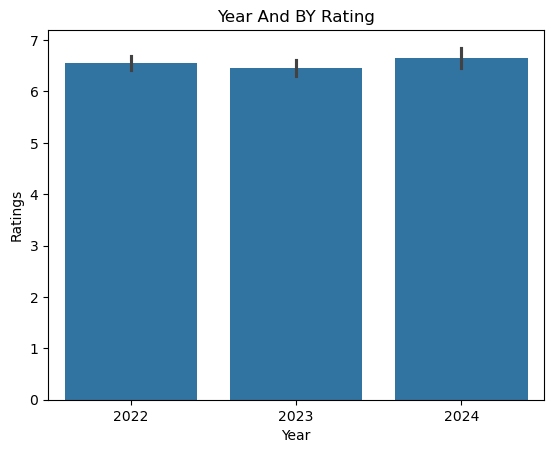

In [7]:
sns.barplot(x="Year",y="Ratings",data=df)
plt.title("Year And BY Rating")
plt.show()

In [8]:
df.groupby("Year")["Gross"].mean()#.sort_values(ascending=True)

Year
2022    2.232499e+06
2023    1.344661e+06
2024    5.640626e+05
Name: Gross, dtype: float64

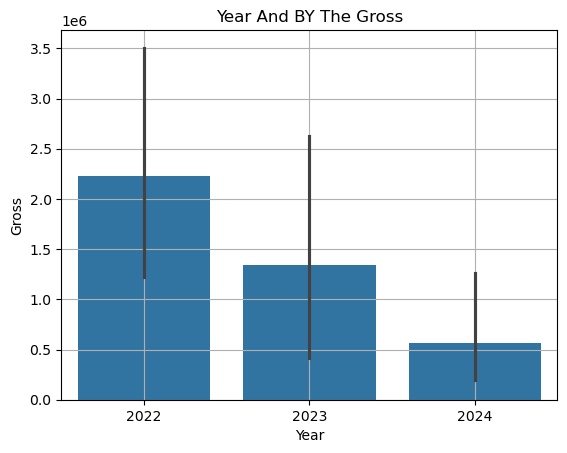

In [9]:
sns.barplot(x="Year",y="Gross",data=df)
plt.title("Year And BY The Gross")
plt.grid()
plt.show()

In [10]:
df.groupby("Director")["Ratings"].mean().sort_values(ascending=False)

Director
Rajesh Nellore           10.0
Vikky Varun               9.9
Rohit Chouhan             9.9
Shashikanth Gatti         9.8
Udhay Bhaskar             9.8
                         ... 
Dhinakaran Sivalingam     0.0
Sagayanathan              0.0
Dhananjay Galani          0.0
Deepu Karunakaran         0.0
ChandraShekharKanuri      0.0
Name: Ratings, Length: 1106, dtype: float64

In [11]:
top10=df.nlargest(10,"Duration")[["Title","Duration"]].set_index("Title")
top10

Duration
Title                             
Animal                         204
RRR                            187
The Greatest of All Time       183
Kaatera                        183
Cobra                          183
Lorry Chapter-1                183
Maidaan                        181
Dasama                         181
Kalki 2898 AD                  180
Indian 2                       180

<Axes: xlabel='Duration', ylabel='Title'>

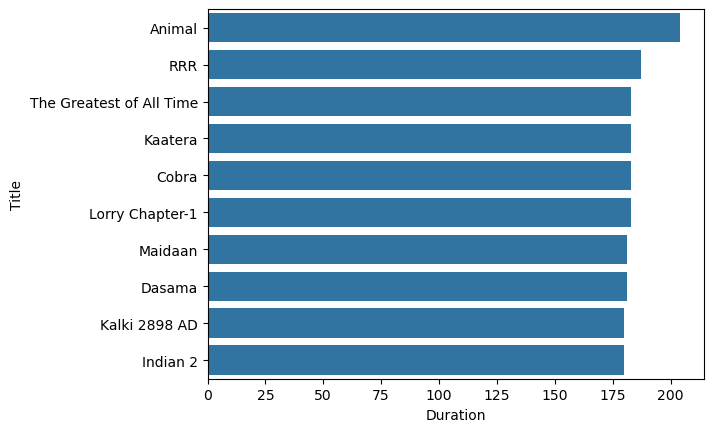

In [13]:
sns.barplot(x="Duration",y=top10.index,data=top10)

<Axes: xlabel='Gross'>

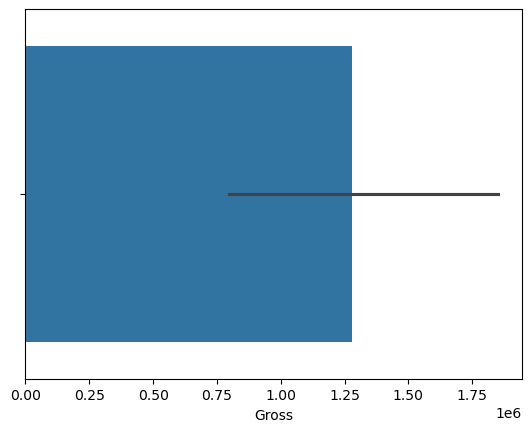

In [21]:
sns.barplot(x="Gross",data=df)

In [14]:
df["Year"].value_counts()

Year
2024    499
2023    394
2022    345
Name: count, dtype: int64

Text(0.5, 1.0, 'Movie Per Year')

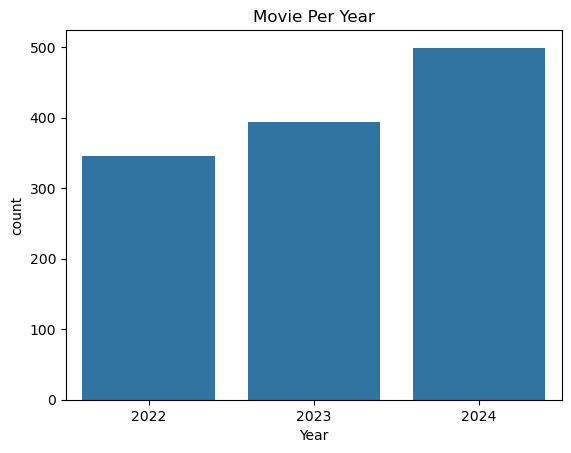

In [15]:
sns.countplot(x="Year",data=df)
plt.title("Movie Per Year")

In [16]:
df[df["Gross"].max()==df["Gross"]]

Title  Year  Duration  Ratings  Reviews Language  \
39   RRR  2022       187      7.8   172000   Telugu   

                                                Genre  \
39  Action Epic Adventure Epic Epic Period Drama A...   

                                                 Plot        Director  \
39  A fearless warrior on a perilous mission comes...  S.S. Rajamouli   

                                             Writer  \
39  Vijayendra PrasadS.S. RajamouliSai Madhav Burra   

                                    Actor      Gross  
39  N.T. Rama Rao Jr.Ram CharanAjay Devgn  166602994

In [17]:
df[df["Gross"].max()==df["Gross"]]["Title"]

39    RRR
Name: Title, dtype: object

In [18]:
top10=df.nlargest(10,"Ratings")[["Title","Ratings","Director"]].set_index("Title")
top10

Ratings            Director
Title                                                   
Kaveri                          10.0      Rajesh Nellore
Kaalapatthar                     9.9         Vikky Varun
Happy Hacker's Day               9.9       Rohit Chouhan
Chithini                         9.8  East Coast Vijayan
Ranchi                           9.8   Shashikanth Gatti
The Rulers                       9.8       Udhay Bhaskar
Saddu Vicharane Nadeyuttide      9.8           Bhaskar R
Fasal                            9.7         Parag Patil
Park                             9.7         E.K.Murugan
Aaragan                          9.7             Arun KR

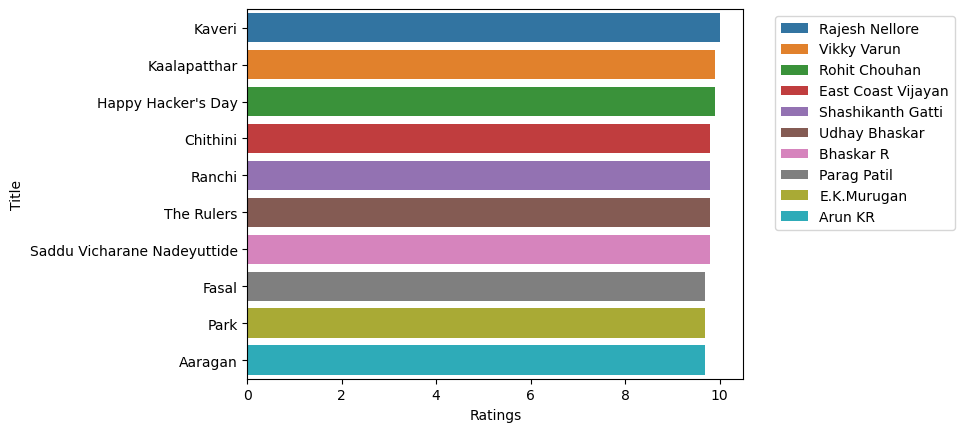

In [19]:
sns.barplot(x="Ratings",y=top10.index,data=top10,hue="Director")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

<Axes: >

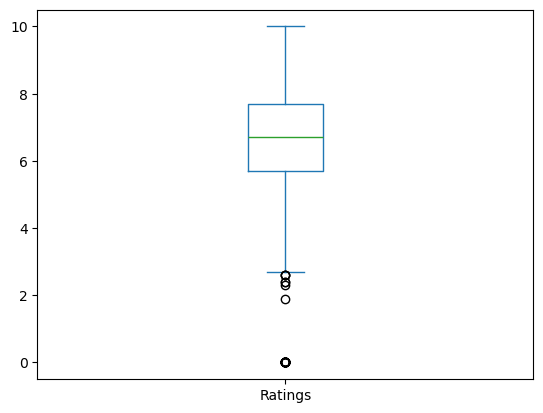

In [20]:
df["Ratings"].plot(kind="box")

In [21]:
def category_ratings(rating):
    if rating == 0:
        return 'Unknown'
    elif rating >0 and rating <=3:
        return 'Bad'
    elif rating>3 and rating <= 6:
        return 'Average'
    else:
        return 'Good'
rating_catogory=df['Ratings'].apply(category_ratings)

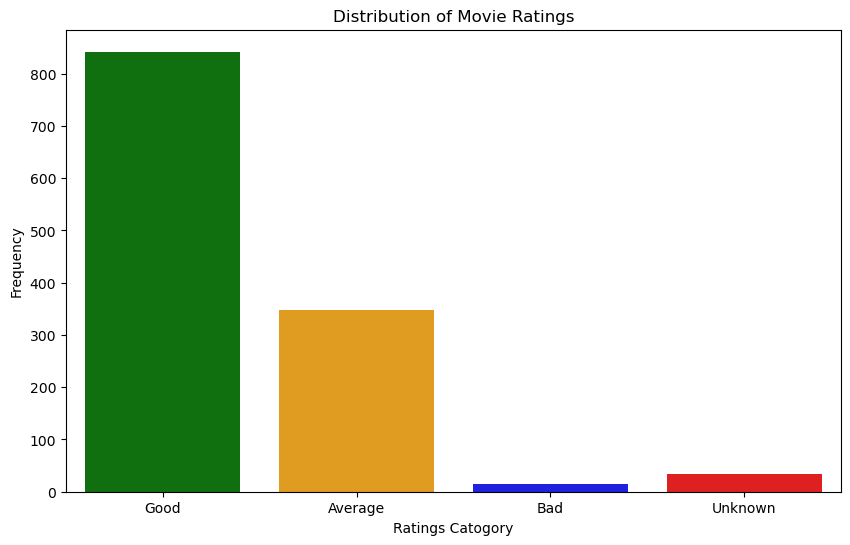

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x=rating_catogory,hue=rating_catogory,palette={'Unknown': 'red', 'Bad': 'blue', 'Average': 'orange', 'Good': 'green'})
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings Catogory')
plt.ylabel('Frequency')
plt.show()

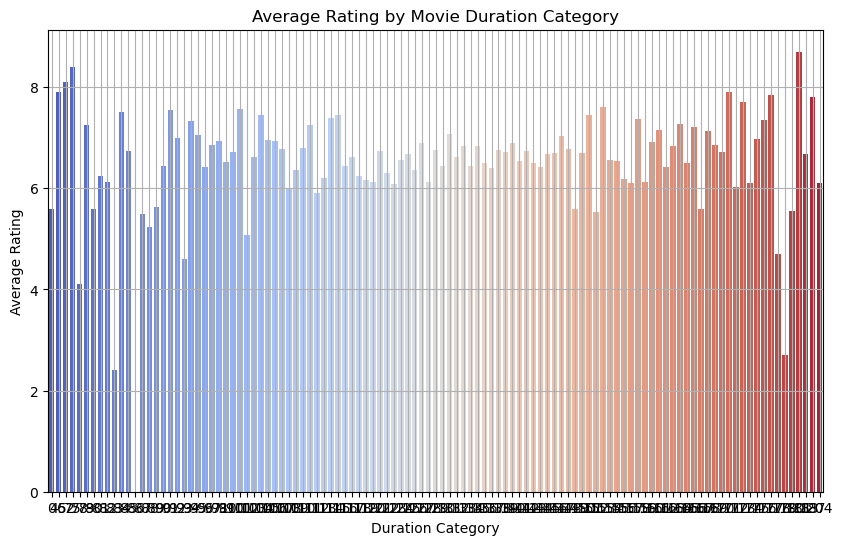

In [23]:
# Define duration categories
bins = [0, 90, 150, float('inf')]
labels = ['Short (<90 min)', 'Medium (90-150 min)', 'Long (>150 min)']
pd.cut(df['Duration'], bins=bins, labels=labels, right=False)

avg_rating_by_duration = df.groupby('Duration')['Ratings'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_by_duration, x='Duration', y='Ratings', palette='coolwarm')
plt.title('Average Rating by Movie Duration Category')
plt.xlabel('Duration Category')
plt.ylabel('Average Rating')
plt.grid()
plt.show()


<Axes: xlabel='Ratings', ylabel='Count'>

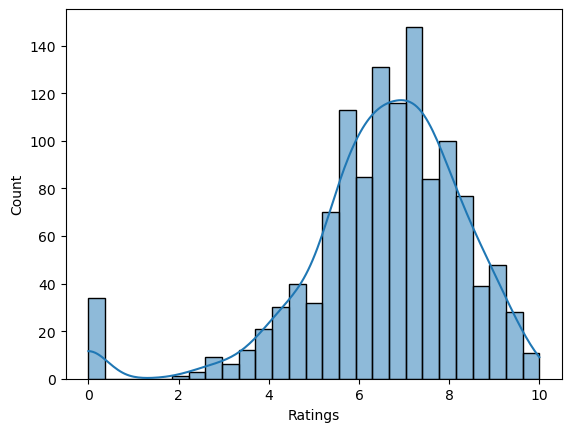

In [24]:
sns.histplot(x='Ratings',data=df,kde=True)

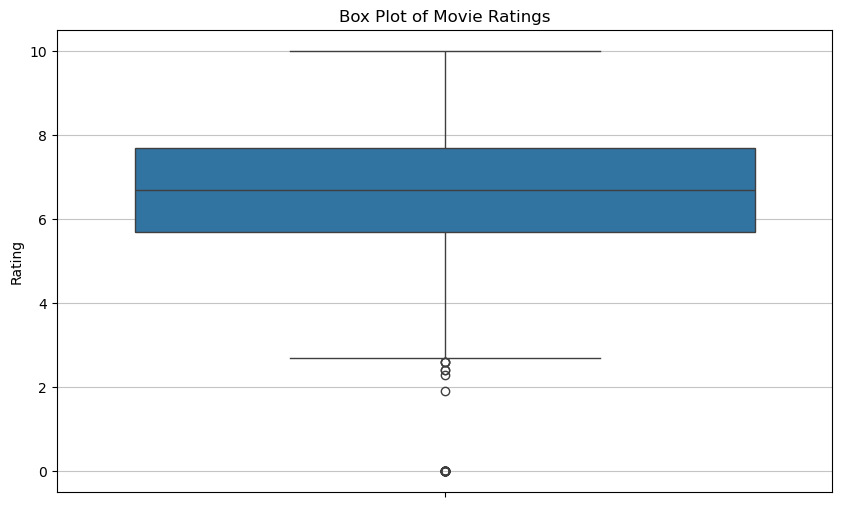

In [25]:

plt.figure(figsize=(10, 6))
sns.boxplot(y='Ratings', data=df)
plt.title('Box Plot of Movie Ratings')
plt.ylabel('Rating')
plt.grid(axis='y', alpha=0.75)
plt.show()


<Axes: xlabel='Reviews', ylabel='Count'>

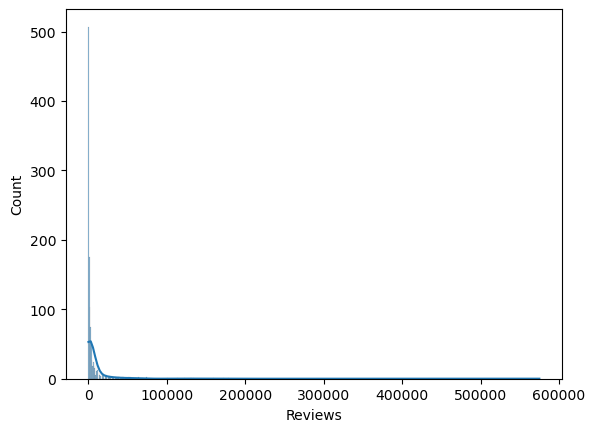

In [26]:
sns.histplot(x='Reviews',data=df,kde=True)

<Axes: xlabel='Year', ylabel='Reviews'>

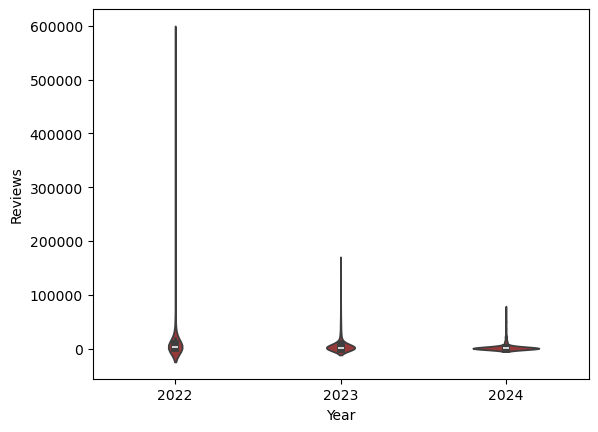

In [27]:
sns.violinplot(x="Year",y ="Reviews",data =df,width =0.4,color ="brown" )

<Axes: title={'center': 'Histogram Of Sales'}, ylabel='Frequency'>

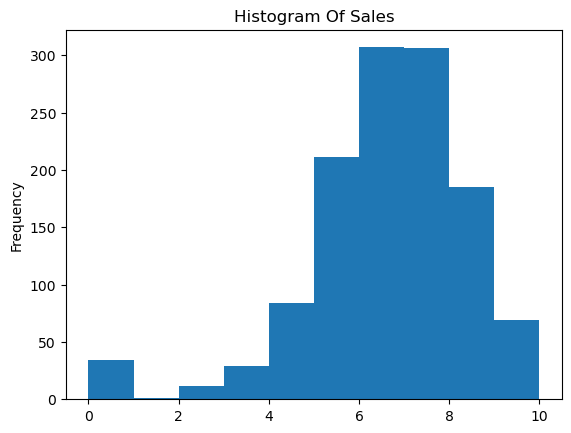

In [28]:
# Histogram
df["Ratings"].plot(kind = "hist",bins =10,title = "Histogram Of Sales")

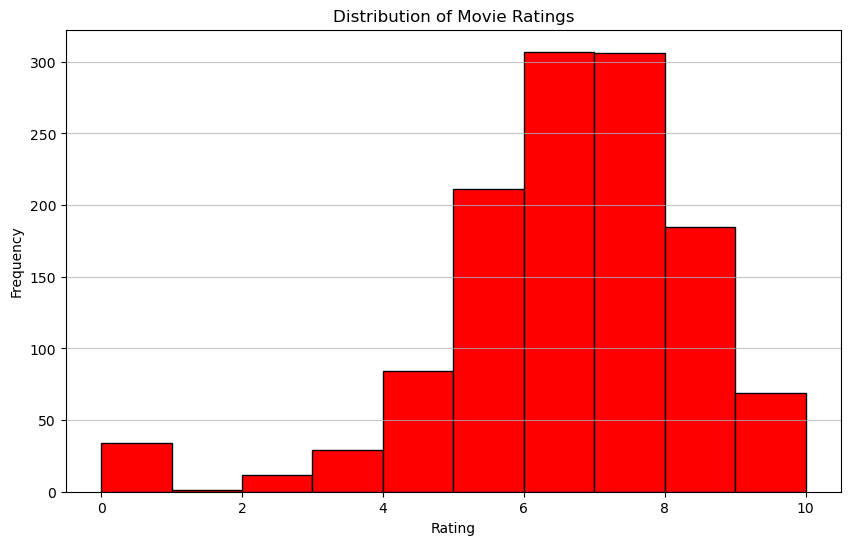

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['Ratings'].dropna(), bins=10, color='red', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


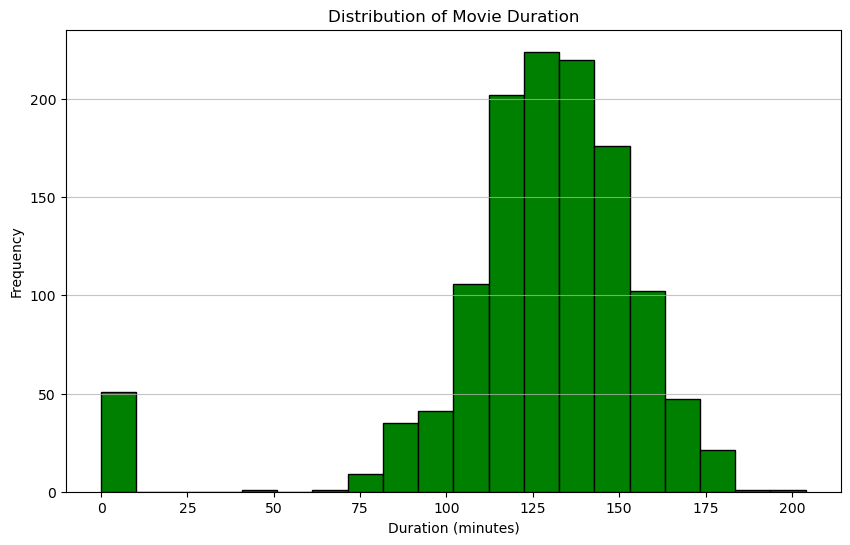

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'],bins=20, color='green', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


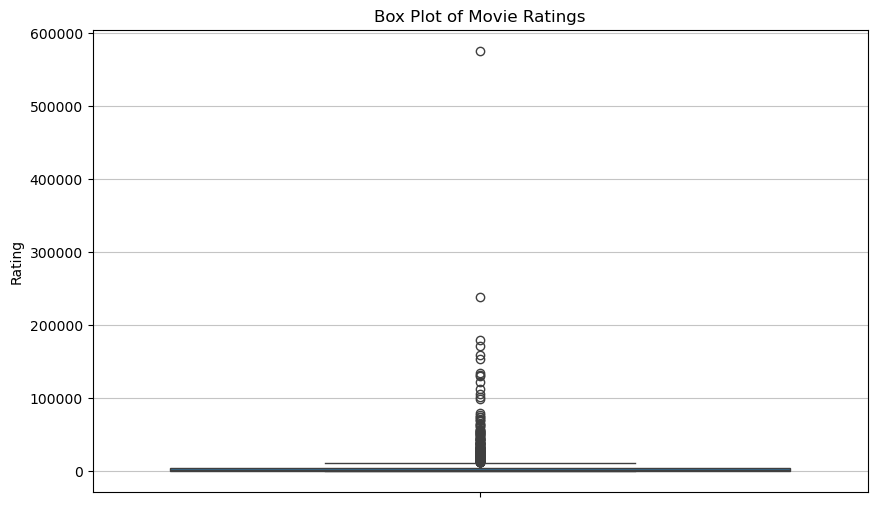

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Reviews', data=df)
plt.title('Box Plot of Movie Ratings')
plt.ylabel('Rating')
plt.grid(axis='y', alpha=0.75)
plt.show()


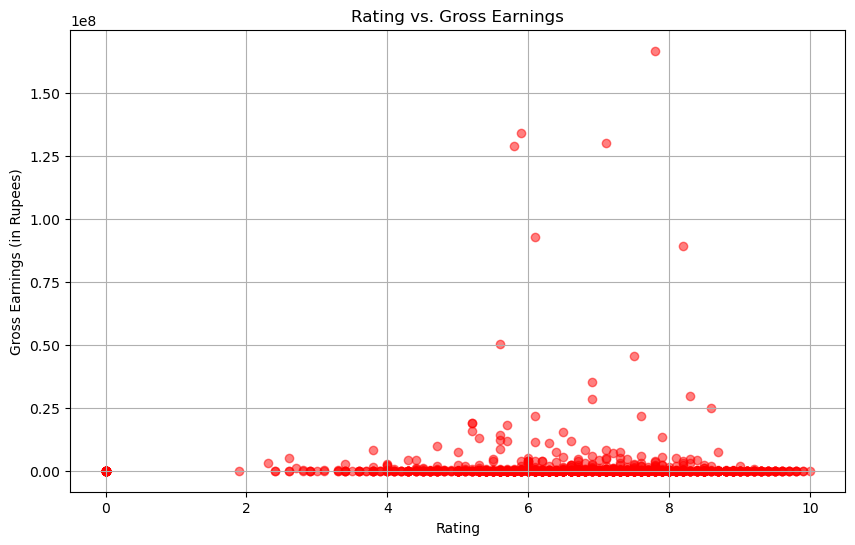

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Ratings'], df['Gross'], alpha=0.5, color='red')
plt.title('Rating vs. Gross Earnings')
plt.xlabel('Rating')
plt.ylabel('Gross Earnings (in Rupees)')
#plt.yscale('log')  # Use log scale for gross earnings
plt.grid(True)
plt.show()


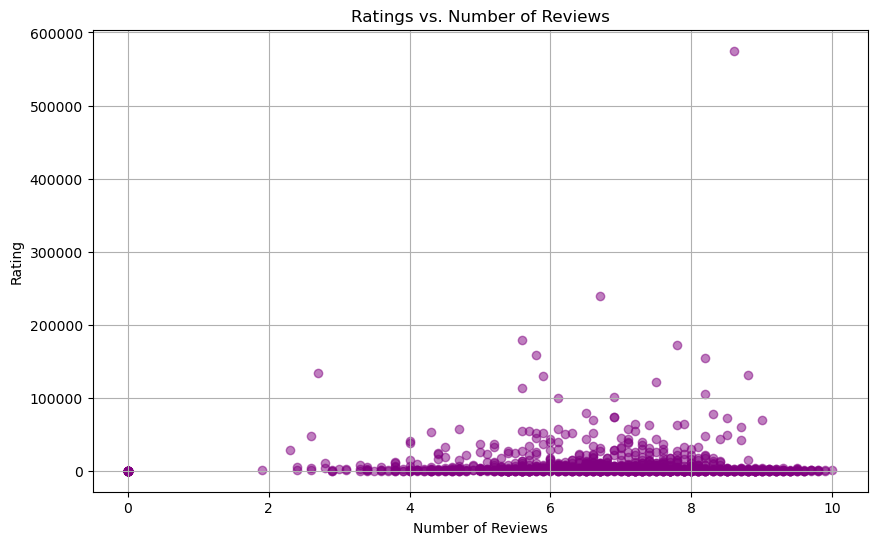

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Ratings'], df['Reviews'], alpha=0.5, color='purple')
plt.title('Ratings vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


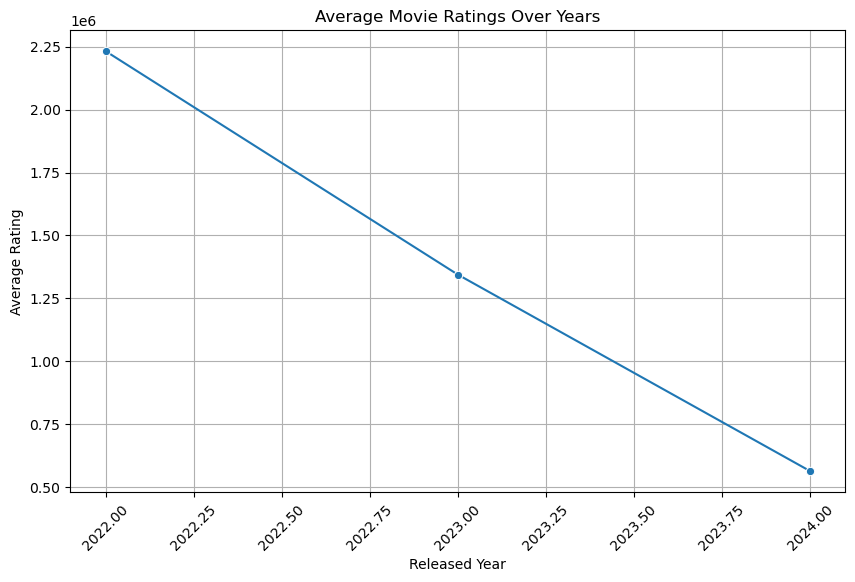

In [34]:
avg_rating_year = df.groupby('Year')['Gross'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Gross', data=avg_rating_year, marker='o')
plt.title('Average Movie Ratings Over Years')
plt.xlabel('Released Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


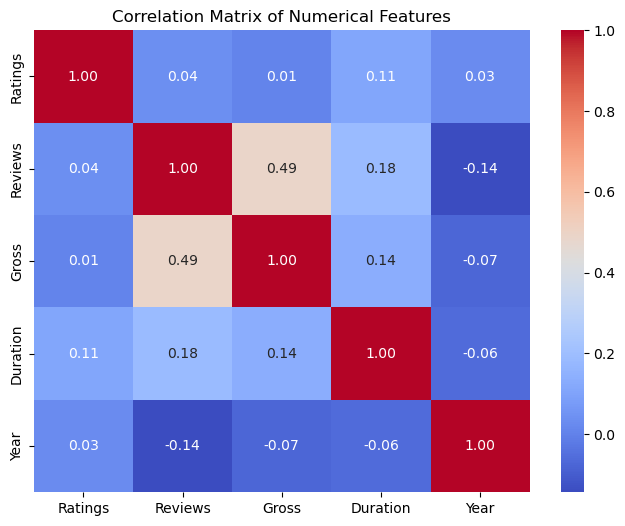

In [35]:
correlation = df[['Ratings', 'Reviews', 'Gross', 'Duration','Year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


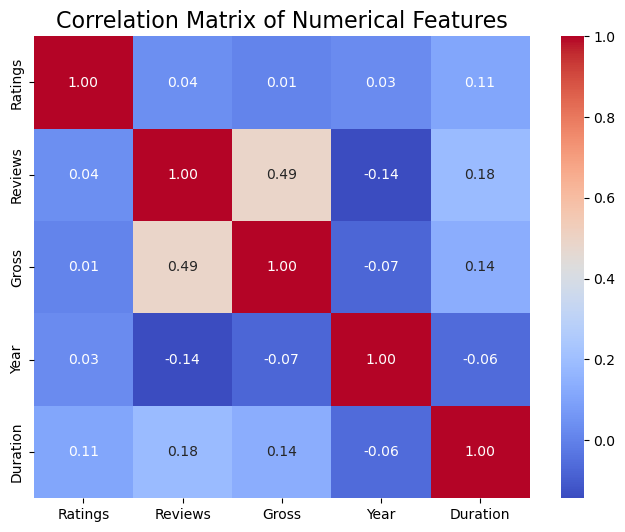

In [36]:
correlation = df[['Ratings', 'Reviews', 'Gross', 'Year','Duration']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features',fontsize=16)
plt.show()

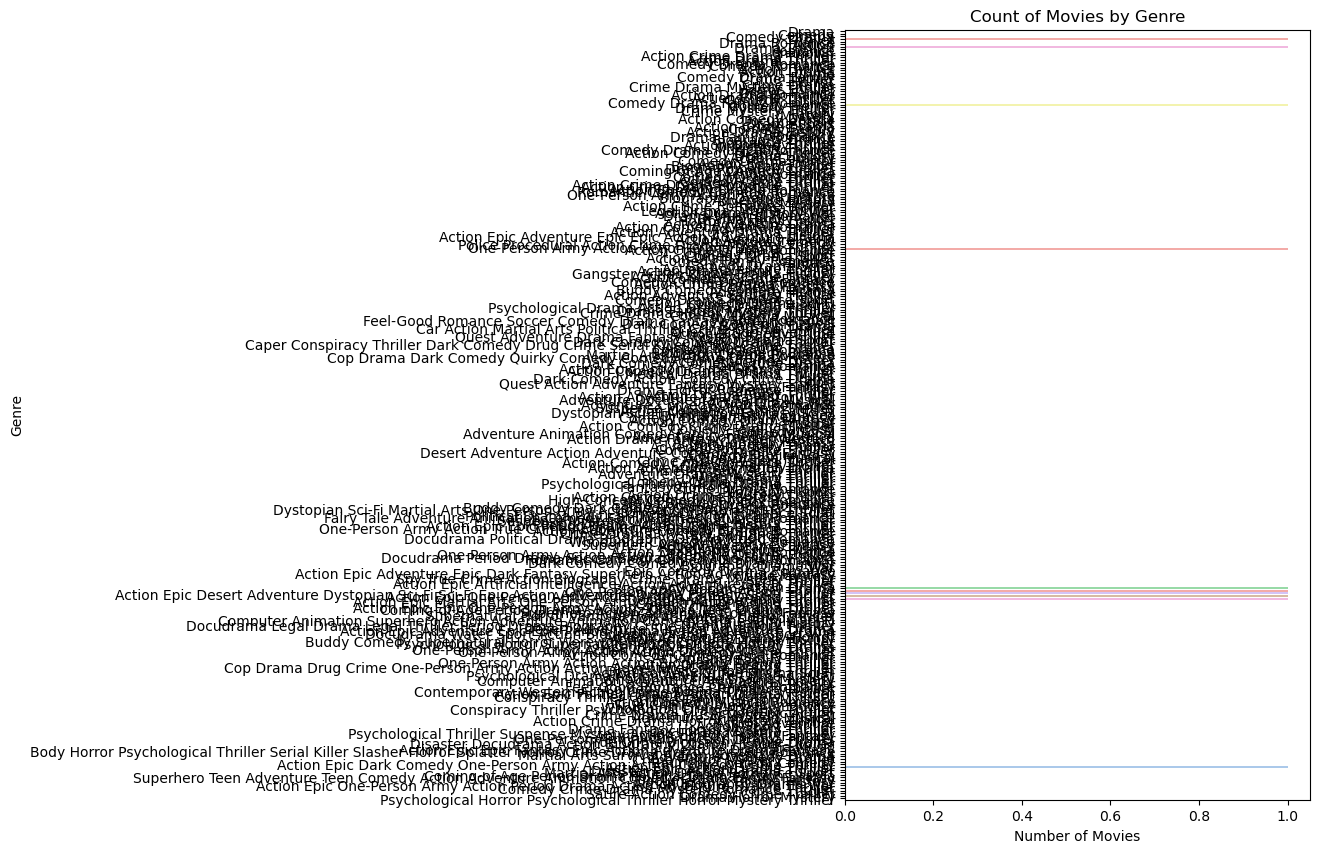

In [37]:
plt.figure(figsize=(6, 10))
sns.countplot(y='Genre', data=df.head(10), order=df['Genre'].value_counts().index, palette='pastel')
plt.title('Count of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

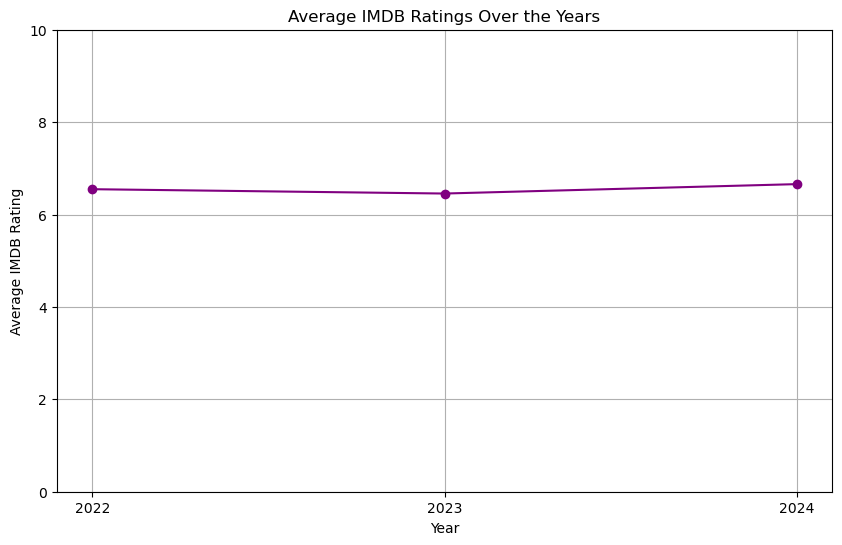

In [38]:
# Group by year and average the ratings
yearly_ratings = df.groupby('Year')['Ratings'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_ratings['Year'], yearly_ratings['Ratings'], marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.title('Average IMDB Ratings Over the Years')
plt.xticks(yearly_ratings['Year'])
plt.ylim(0, 10)
plt.grid()
plt.show()


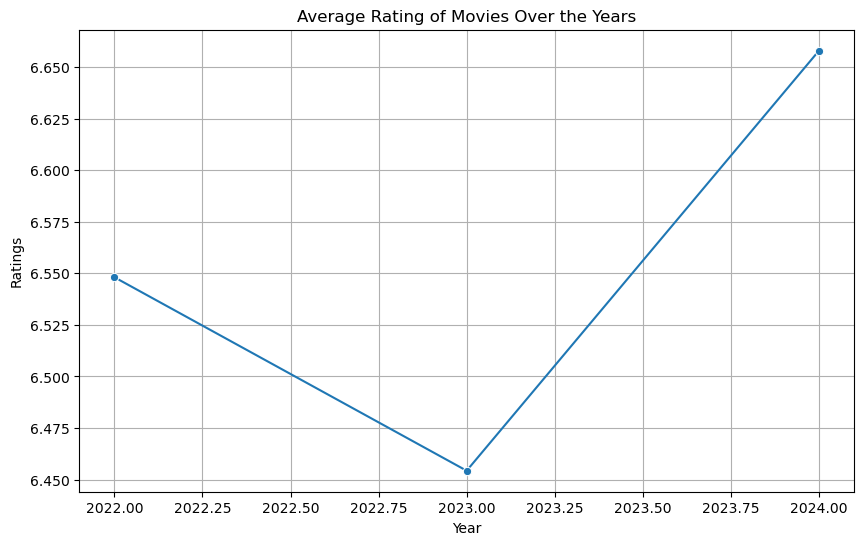

In [39]:
# Average rating of movies over the years
plt.figure(figsize=(10,6))
avg_rating_year = df.groupby('Year')['Ratings'].mean().reset_index()
sns.lineplot(x='Year', y='Ratings', data=avg_rating_year, marker='o')
plt.title('Average Rating of Movies Over the Years')
plt.grid()
plt.show()

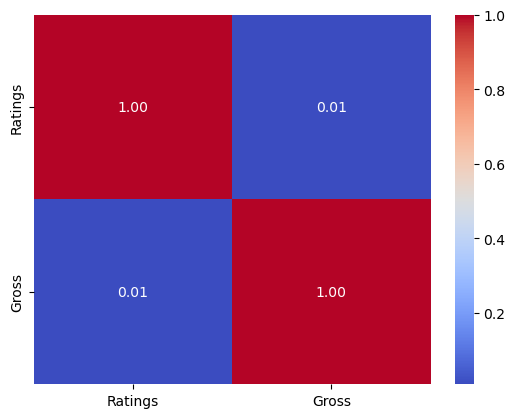

In [40]:
# Correlation matrix heatmap
mat = df[['Ratings', 'Gross']].corr()
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('')
plt.show()


In [41]:
print(len(df["Genre"]))
print()

1238



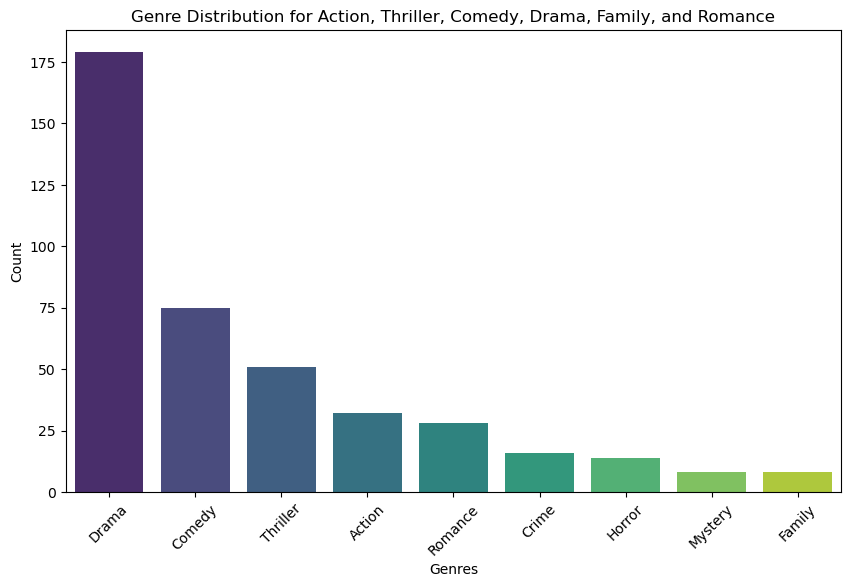

In [42]:
# Convert 'Gener' to string and handle NaN values
df['Genre'] = df['Genre'].astype(str).str.split(', ')
df_exploded = df.explode('Genre')

# Filter for specific genres
filtered_genres = df_exploded[df_exploded['Genre'].isin(['Action', 'Thriller', 'Comedy', 'Drama', 'Family', 'Romance','Horror','Crime','Epic','Adventure', 'Mystery'])]

# Count occurrences of each genre
genre_counts = filtered_genres['Genre'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution for Action, Thriller, Comedy, Drama, Family, and Romance')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


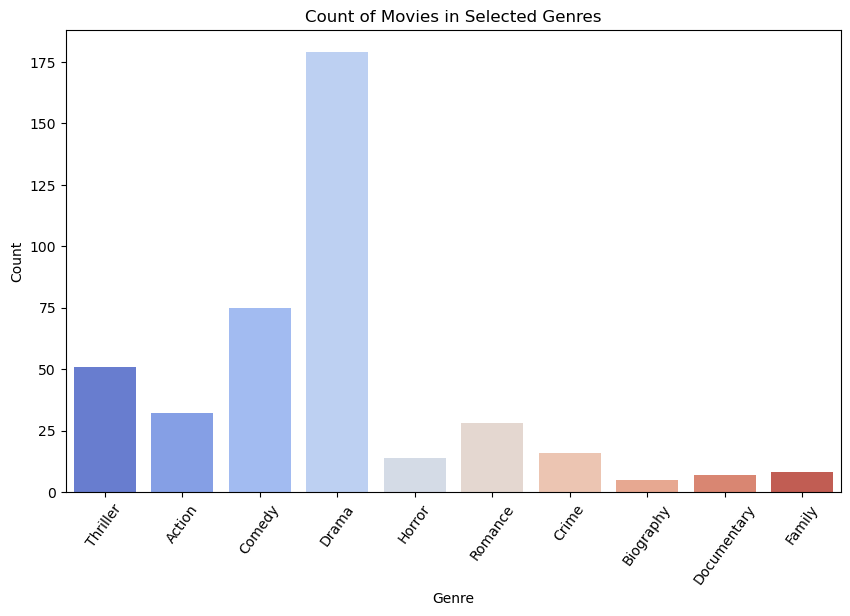

In [43]:
# Filter for specific genres
#filtered_genres = df_exploded[df_exploded['Gener'].isin(['Action', 'Drama', 'Comedy', 'Thriller', 'Romance','Family','Horror','Crime','Adventure','Biography','Documentary',])]

# Filter for specific genres
filtered_genres = df_exploded[df_exploded['Genre'].isin(['Action', 'Drama', 'Comedy', 'Thriller', 'Romance','Family','Horror','Crime','Adventure','Biography','Documentary'])]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_genres, x='Genre', palette='coolwarm')
plt.title('Count of Movies in Selected Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=54)
plt.show()


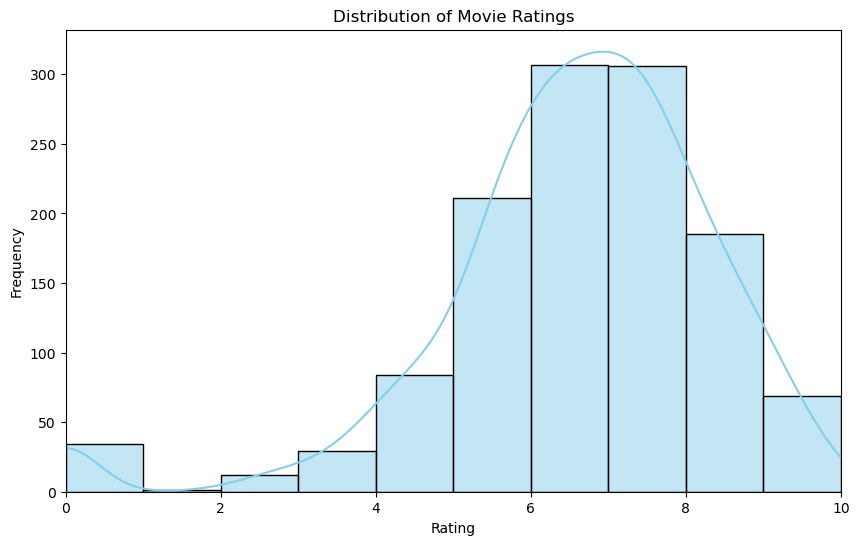

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.show()

In [45]:
# Filter for specific genres
#filtered_genres = df_exploded[df_exploded['Gener'].isin(['Action', 'Drama', 'Comedy', 'Thriller', 'Romance','Family','Horror','Crime','Adventure','Biography','Documentary',])]

# Filter for specific genres
#filtered_genres = df_exploded[df_exploded['Genre'].isin(['Action', 'Drama', 'Comedy', 'Thriller', 'Romance','Family','Horror','Crime','Adventure','Biography','Documentary'])]

#plt.figure(figsize=(10, 6))
#sns.countplot(data=filtered_genres, x='Genre', palette='coolwarm')
#plt.title('Count of Movies in Selected Genres')
#plt.xlabel('Genre')
#plt.ylabel('Count')
#plt.xticks(rotation=45)
#plt.show()


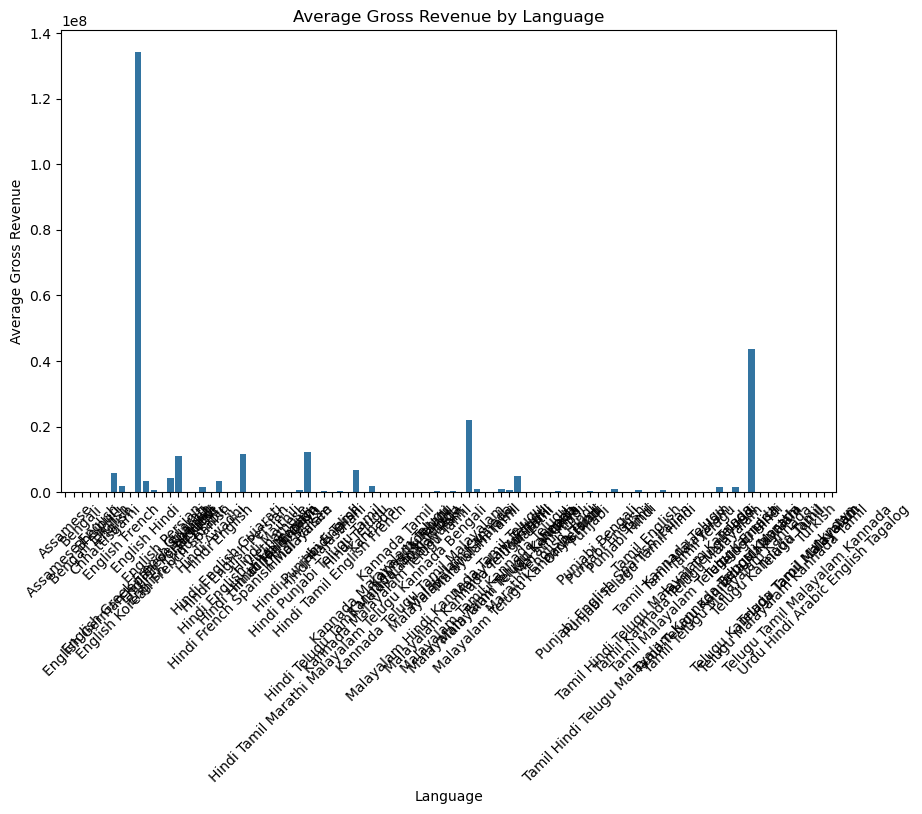

In [46]:
# Calculate average gross by language
avg_gross_by_language = df.groupby('Language')['Gross'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_gross_by_language, x='Language', y='Gross')
plt.title('Average Gross Revenue by Language')
plt.xlabel('Language')
plt.ylabel('Average Gross Revenue')
plt.xticks(rotation=45)
plt.show()


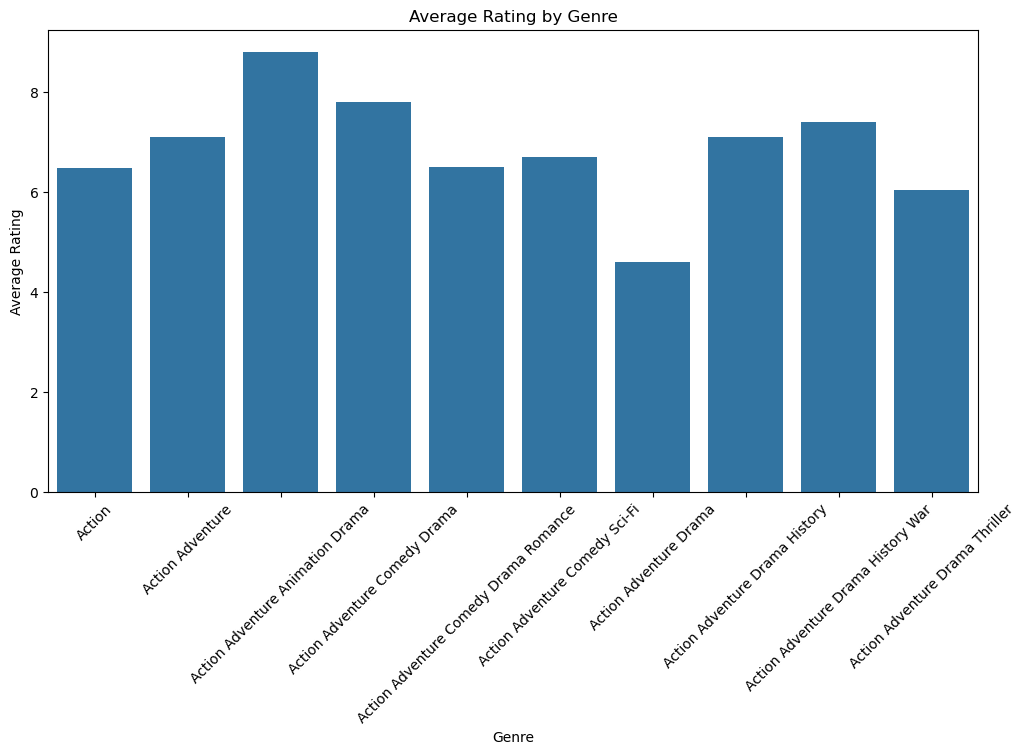

In [47]:
# Calculate average rating by genre
avg_rating_by_genre = df_exploded.groupby('Genre')['Ratings'].mean().reset_index().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rating_by_genre, x='Genre', y='Ratings')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


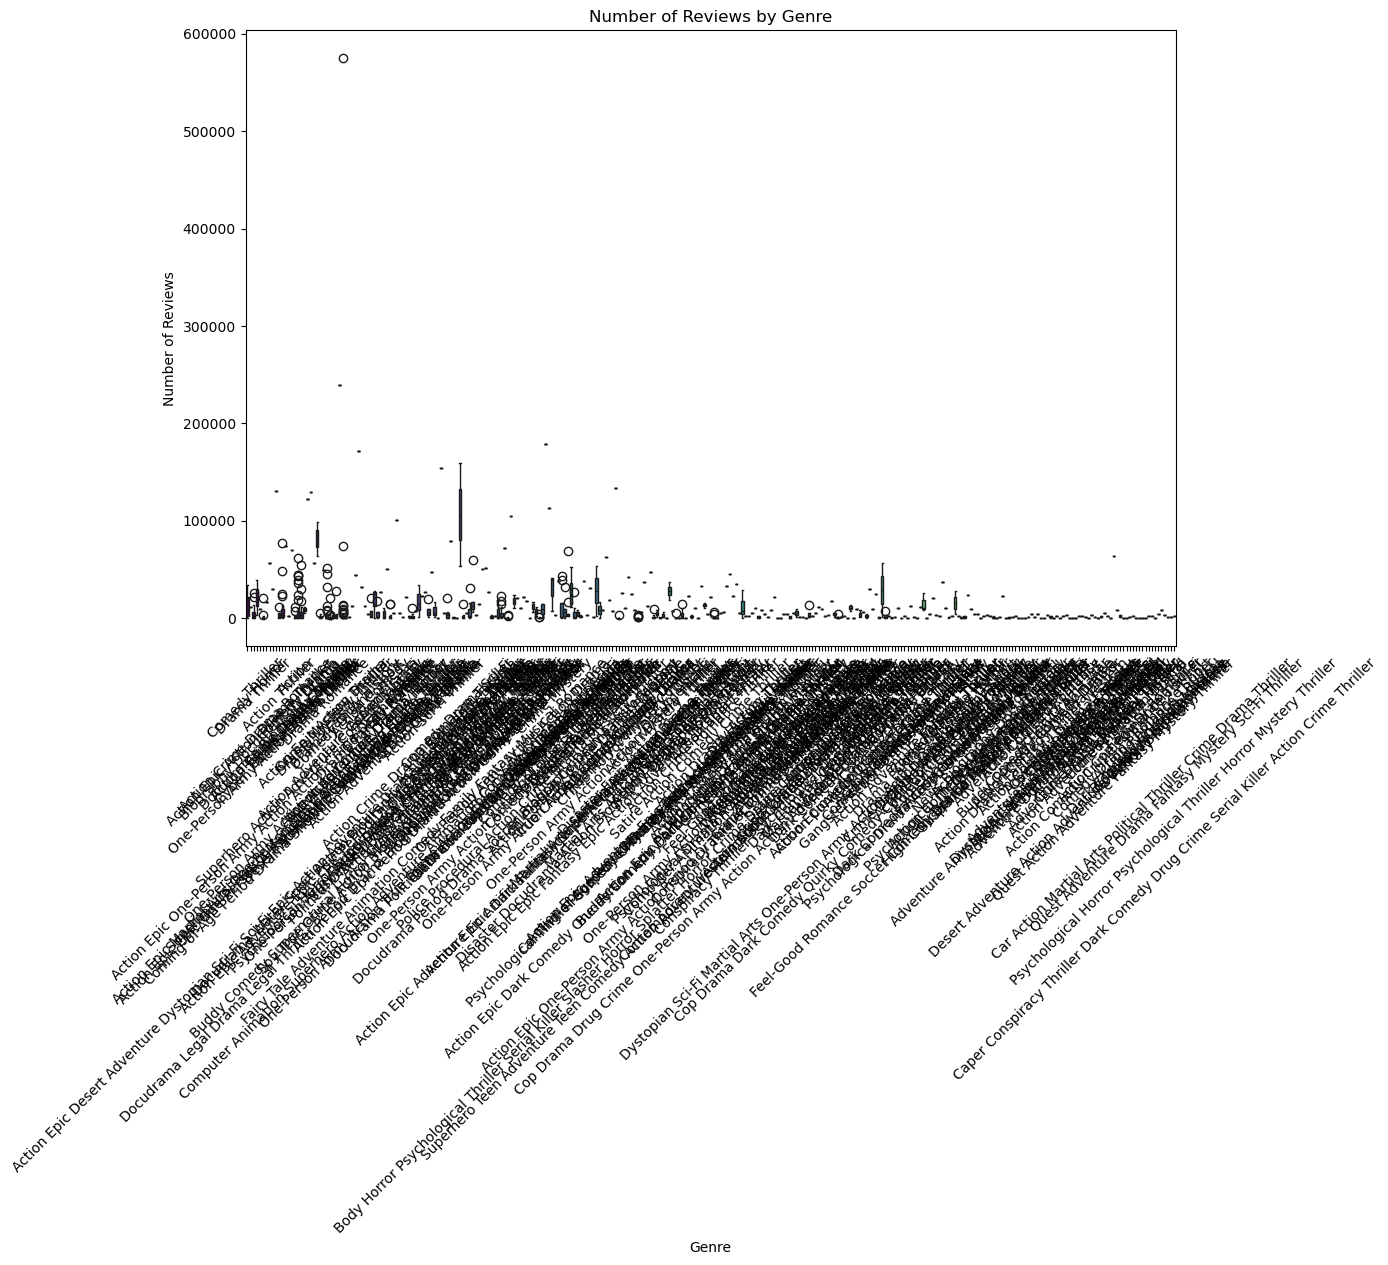

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_exploded, x='Genre', y='Reviews', palette='viridis')
plt.title('Number of Reviews by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


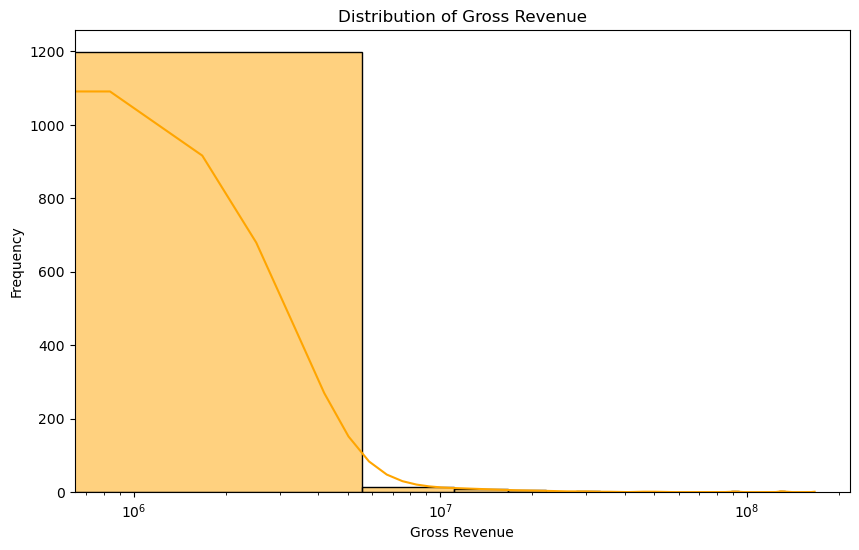

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Gross'], bins=30, kde=True, color='orange')
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.xscale('log')  # Use log scale for better visualization
plt.show()

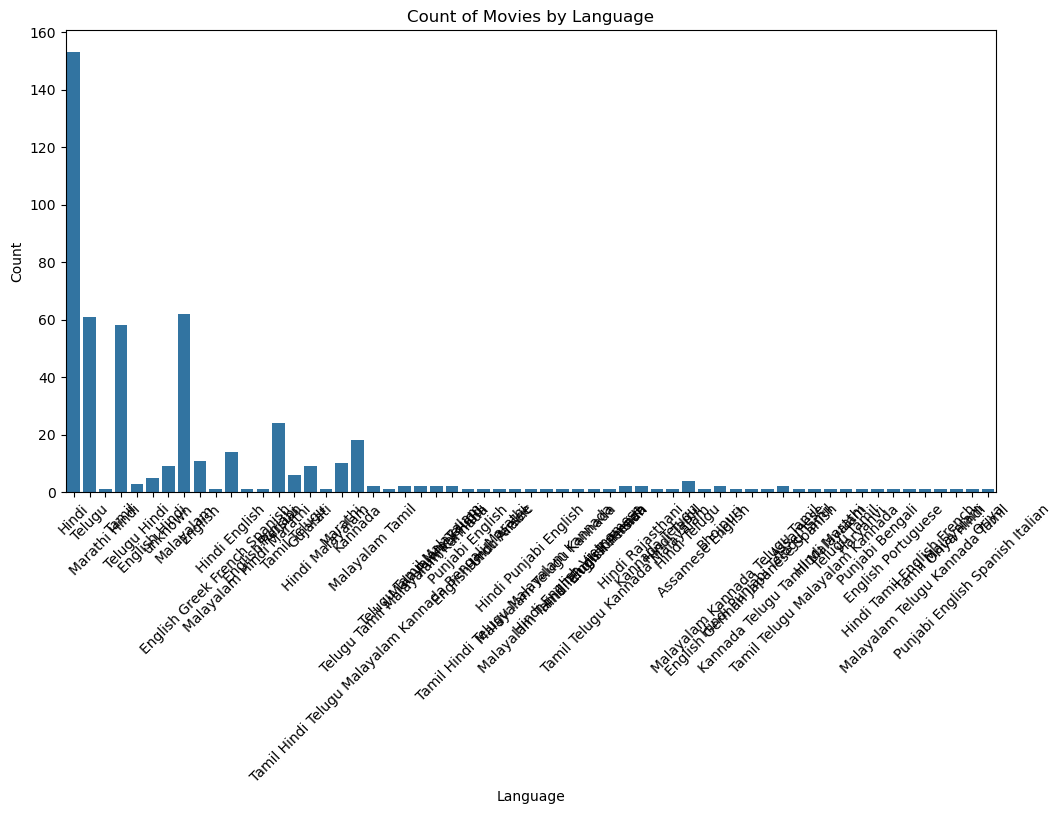

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df.head(500), x='Language')
plt.title('Count of Movies by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


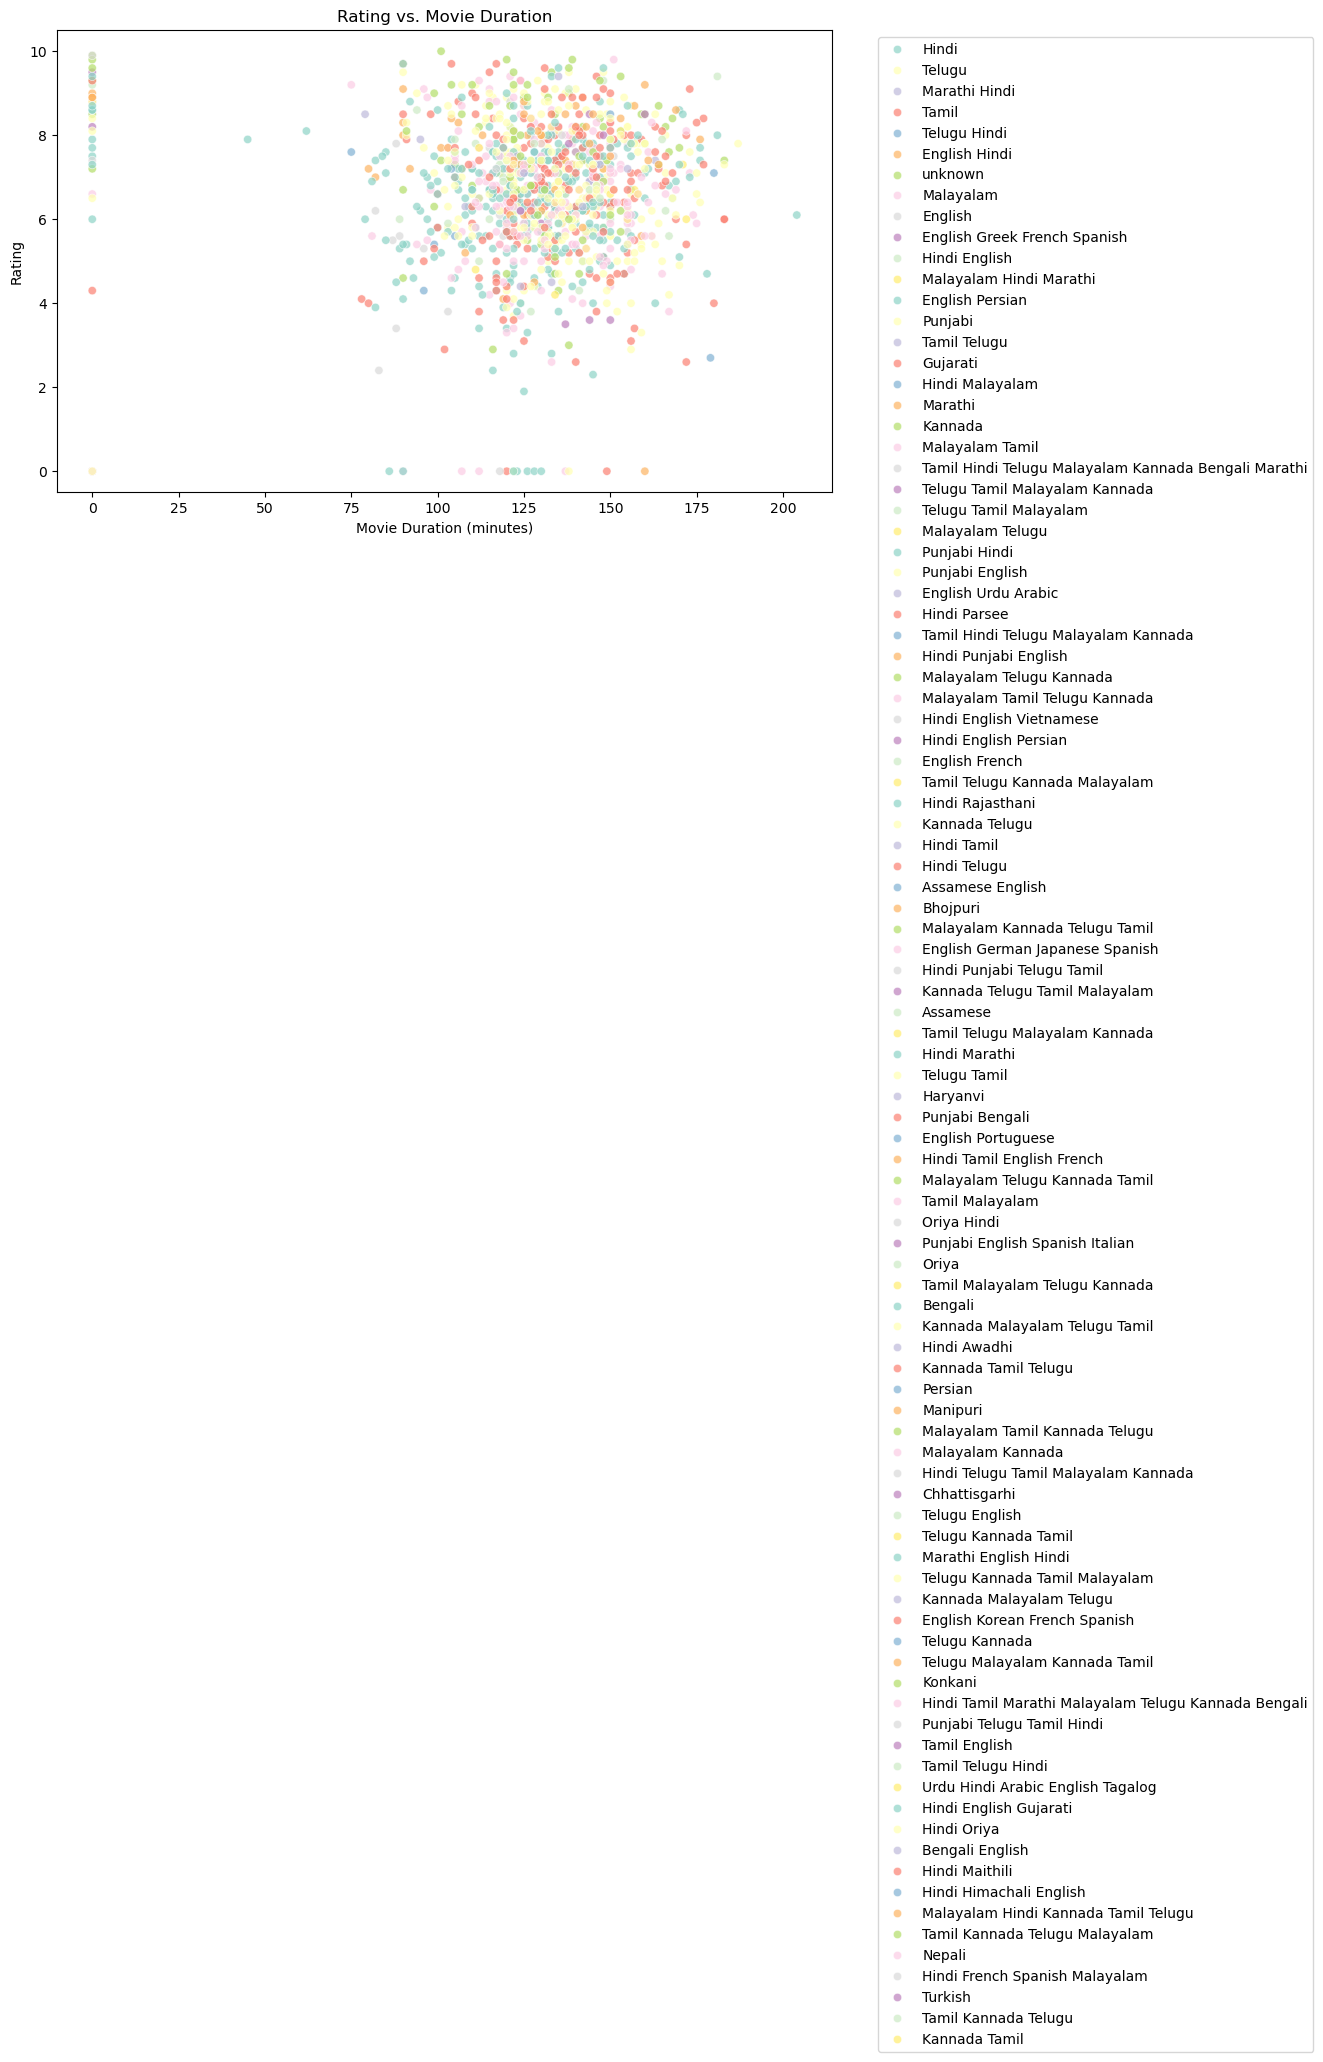

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration', y='Ratings', hue='Language', palette='Set3', alpha=0.7)
plt.title('Rating vs. Movie Duration')
plt.xlabel('Movie Duration (minutes)')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.ylabel('Rating')
plt.show()


In [52]:
top_10=df.nlargest(10,"Gross")[["Title","Gross"]].set_index("Title")
top_10

Gross
Title                                
RRR                         166602994
Shazam! Fury of the Gods    134138006
Kalki 2898 AD               130000000
Pathaan                     128780000
Animal                       92870950
K.G.F: Chapter 2             89123940
Brahmastra Part One: Shiva   50164785
The Fabelmans                45620703
Monkey Man                   35270081
Vikram                       29837637

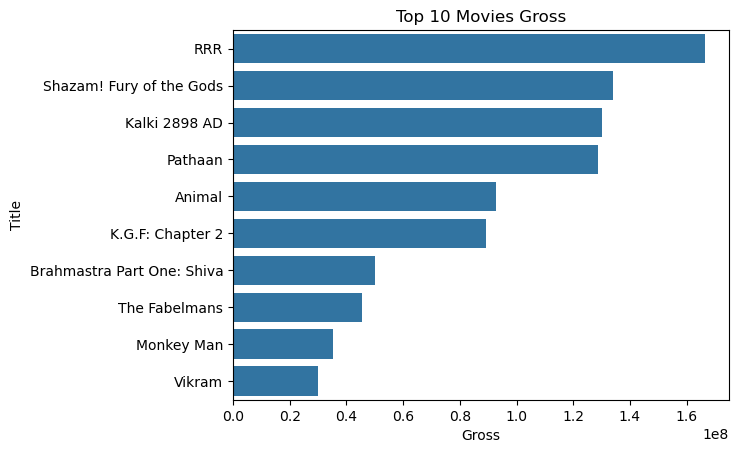

In [53]:
sns.barplot(x="Gross",y=top_10.index,data=top_10)
plt.title("Top 10 Movies Gross")
plt.show()

In [54]:
top10=df.nlargest(10,"Ratings")[["Title","Ratings","Director"]].set_index("Title")
top10

Ratings            Director
Title                                                   
Kaveri                          10.0      Rajesh Nellore
Kaalapatthar                     9.9         Vikky Varun
Happy Hacker's Day               9.9       Rohit Chouhan
Chithini                         9.8  East Coast Vijayan
Ranchi                           9.8   Shashikanth Gatti
The Rulers                       9.8       Udhay Bhaskar
Saddu Vicharane Nadeyuttide      9.8           Bhaskar R
Fasal                            9.7         Parag Patil
Park                             9.7         E.K.Murugan
Aaragan                          9.7             Arun KR

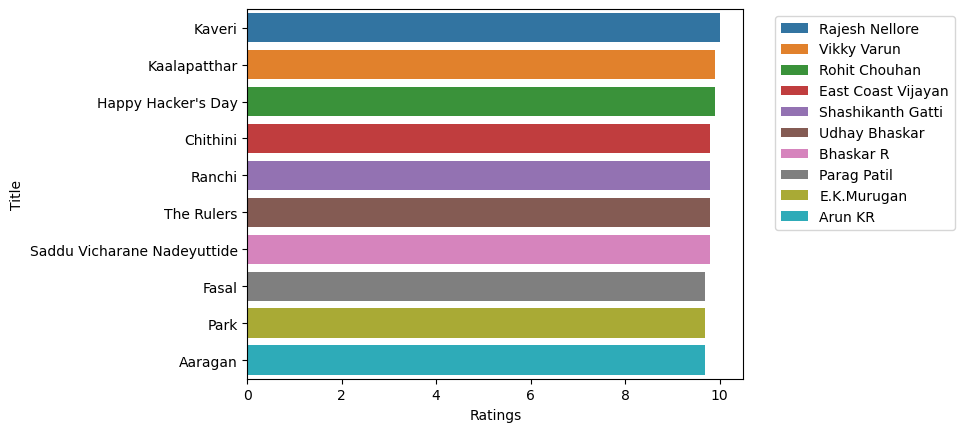

In [55]:
sns.barplot(x="Ratings",y=top10.index,data=top10,hue="Director")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [56]:
def Rating(Rating):
    if Rating>=8.0:
        return "Excellent"
    elif Rating>=6.0:
        return "Good"
    else:
        return "Average"

df["Reviews"]=df["Ratings"].apply(Rating)

In [57]:
df.head(10)

Title  Year  Duration  Ratings    Reviews  \
0  Stree 2: Sarkate Ka Aatank  2024       147      7.3       Good   
1               Devara Part 1  2024       176      6.4       Good   
2                       Ulajh  2024       150      6.4       Good   
3    Auron Mein Kahan Dum Tha  2024       150      7.3       Good   
4                Dharmaveer 2  2024       130      7.5       Good   
5                   Sector 36  2024       123      7.2       Good   
6    The Greatest of All Time  2024       183      6.0       Good   
7               Kalki 2898 AD  2024       180      7.1       Good   
8                        Kill  2023       105      7.6       Good   
9                   12th Fail  2023       147      8.8  Excellent   

        Language                                              Genre  \
0          Hindi                                    [Comedy Horror]   
1         Telugu                [Action Epic Action Drama Thriller]   
2          Hindi                                   [Drama Thriller]   
3          Hindi                       [Action Crime Drama Romance]   
4  Marathi Hindi                      [Biography Documentary Drama]   
5          Hindi                                         [Thriller]   
6          Tamil           [One-Person Army Action Action Thriller]   
7   Telugu Hindi  [Action Epic Desert Adventure Dystopian Sci-Fi...   
8          Hindi  [Action Epic One-Person Army Action Action Cri...   
9          Hindi                        [Docudrama Biography Drama]   

                                                Plot            Director  \
0  After the events of Stree, the town of Chander...        Amar Kaushik   
1  An epic action saga set against coastal lands,...       Koratala Siva   
2  The journey of a young IFS officer, belonging ...     Sudhanshu Saria   
3  After 20 years in prison, a man reunites with ...       Neeraj Pandey   
4  Explores Anand Dighe's life, tracing his polit...        Pravin Tarde   
5  A fictional story Inspired by true events, sev...    Aditya Nimbalkar   
6  Gandhi is a hostage negotiator, field agent, a...       Venkat Prabhu   
7  The future of those in the dystopian city of K...          Nag Ashwin   
8  During a train trip to New Delhi, a pair of co...  Nikhil Nagesh Bhat   
9  The real-life story of IPS Officer Manoj Kumar...  Vidhu Vinod Chopra   

                                           Writer  \
0             Niren BhattKrishna D.K.Raj Nidimoru   
1                                   Koratala Siva   
2       Parveez SheikhSudhanshu SariaAtika Chohan   
3                                   Neeraj Pandey   
4                                    Pravin Tarde   
5                           Bodhayan Roychaudhury   
6   M Prasad BabuK. ChandruEzhilarasu Gunasekaran   
7                                      Nag Ashwin   
8                   Nikhil Nagesh BhatAyesha Syed   
9  Vidhu Vinod ChopraJaskunwar KohliAnurag Pathak   

                                         Actor      Gross  
0  Rajkummar RaoShraddha KapoorPankaj Tripathi    7388627  
1  N.T. Rama Rao Jr.Saif Ali KhanJanhvi Kapoor    7331058  
2    Janhvi KapoorRoshan MathewGulshan Devaiah      90346  
3                 Ajay DevgnTabuJimmy Shergill     144378  
4        Sunil BarveRajesh BhosleKshitish Date          0  
5   Vikrant MasseyDeepak DobriyalAkash Khurana          0  
6             Joseph VijayPrashanthPrabhu Deva    4004296  
7       Sharik Khan Jr.PrabhasAmitabh Bachchan  130000000  
8           LakshyaRaghav JuyalTanya Maniktala    1930699  
9        Vikrant MasseyMedha ShankrAnant Joshi     138288

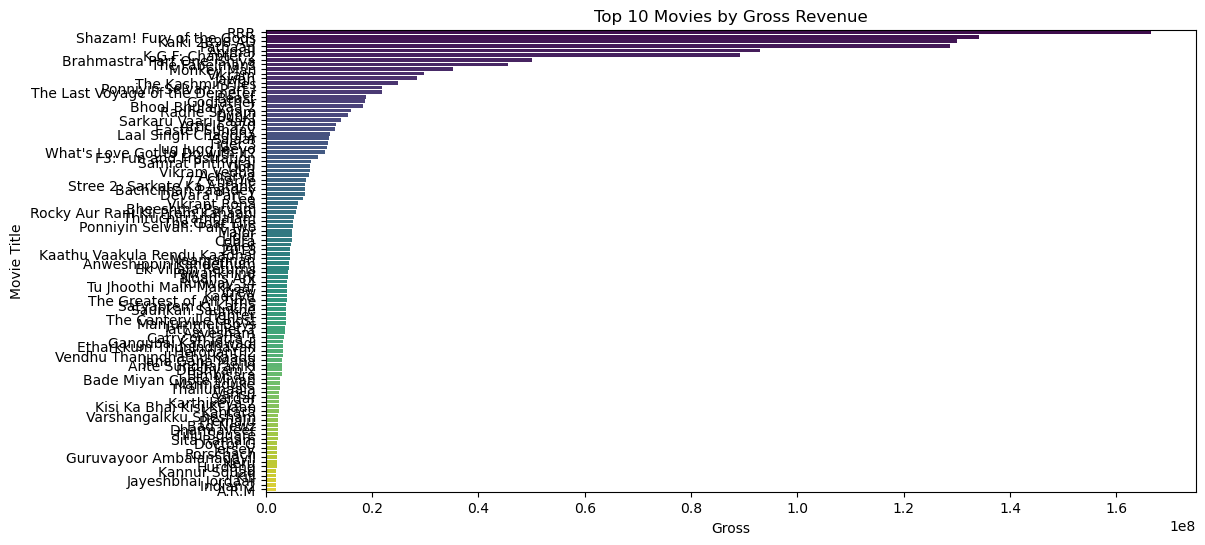

In [58]:
top_gross_movies = df.nlargest(100, 'Gross')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_gross_movies, x='Gross', y='Title', palette='viridis')
plt.title('Top 10 Movies by Gross Revenue')
plt.xlabel('Gross')
plt.ylabel('Movie Title')
plt.show()


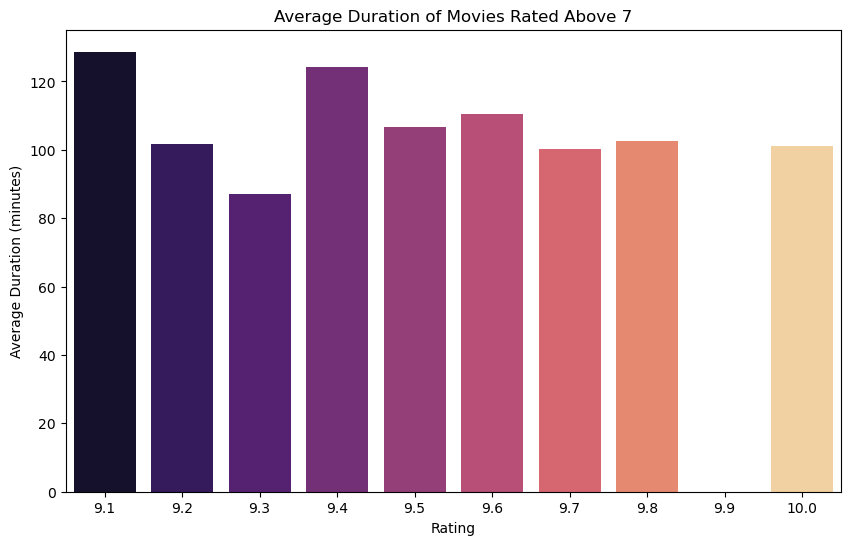

In [59]:
high_rated_movies = df[df['Ratings'] > 9]
avg_duration_high_rated = high_rated_movies.groupby('Ratings')['Duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration_high_rated, x='Ratings', y='Duration', palette='magma')
plt.title('Average Duration of Movies Rated Above 7')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.show()


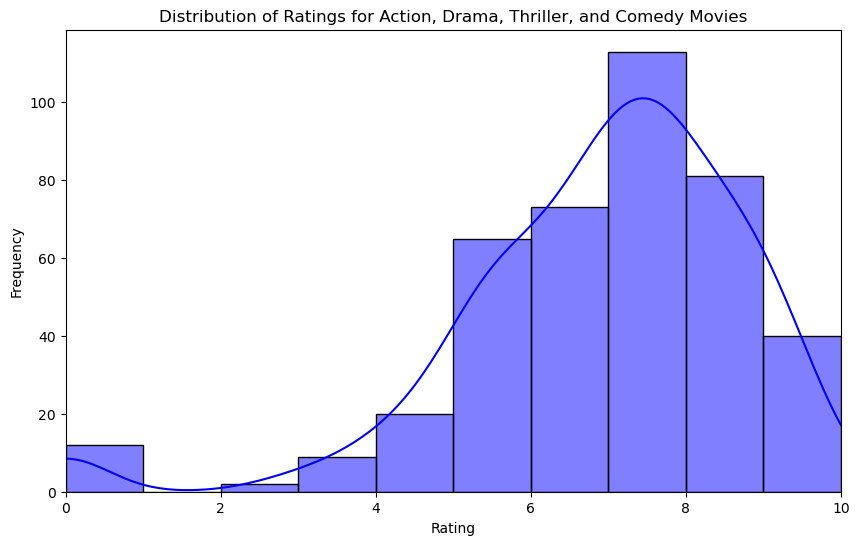

In [60]:
# Correctly filter for multiple genres using .isin()
action_movies = df_exploded[df_exploded['Genre'].isin(['Action', 'Drama', 'Comedy', 'Thriller', 'Romance','Family','Horror','Crime','Adventure','Biography','Documentary',])]

plt.figure(figsize=(10, 6))
sns.histplot(action_movies['Ratings'], bins=10, kde=True, color='Blue')
plt.title('Distribution of Ratings for Action, Drama, Thriller, and Comedy Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.show()


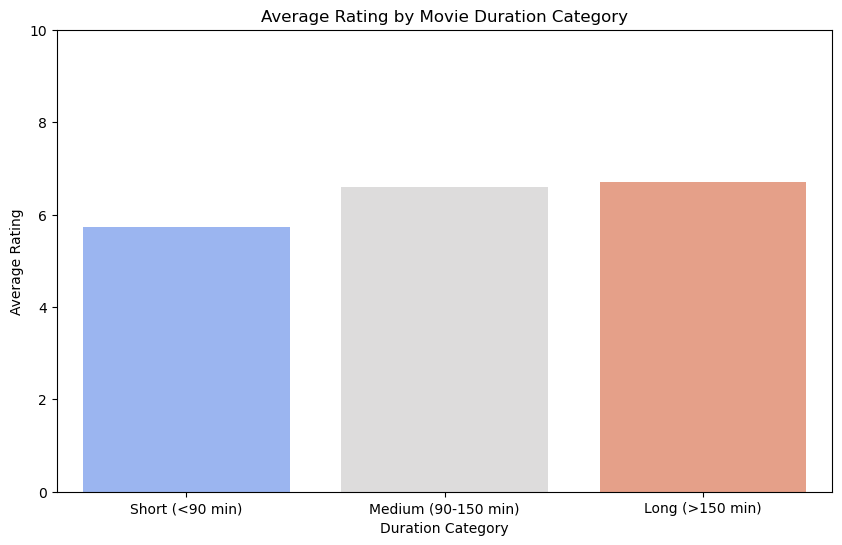

In [61]:
# Define bins and labels for duration categories
bins = [0, 90, 150, float('inf')]
labels = ['Short (<90 min)', 'Medium (90-150 min)', 'Long (>150 min)']

# Create a new DataFrame for grouping
avg_rating_by_duration = df.groupby(pd.cut(df['Duration'], bins=bins, labels=labels, right=False))['Ratings'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_by_duration, x='Duration', y='Ratings', palette='coolwarm')
plt.title('Average Rating by Movie Duration Category')
plt.xlabel('Duration Category')
plt.ylim(0,10)
plt.ylabel('Average Rating')
plt.show()


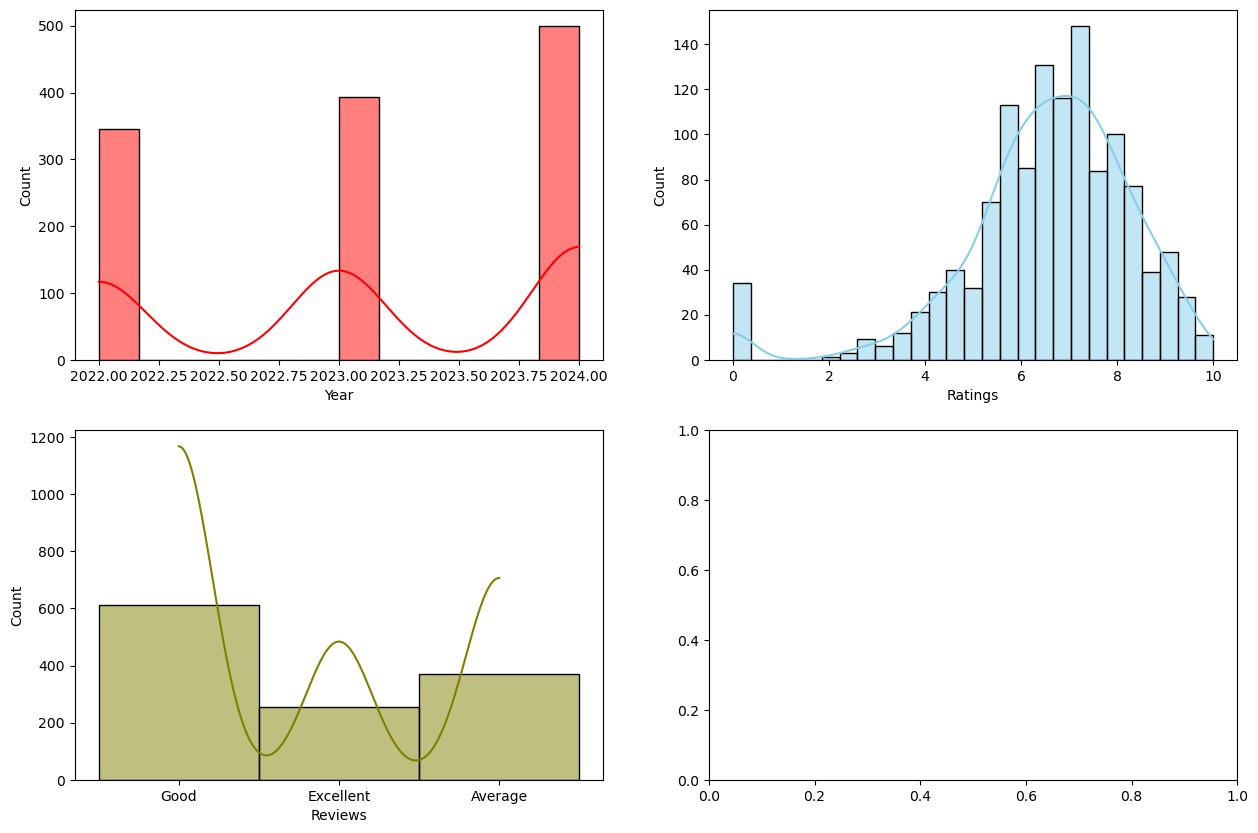

In [62]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Create subplots first
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Now plot using the correct indexing
sns.histplot(data=df, x="Year", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df, x="Ratings", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df, x="Reviews", kde=True, color="olive", ax=axs[1, 0])

plt.show()

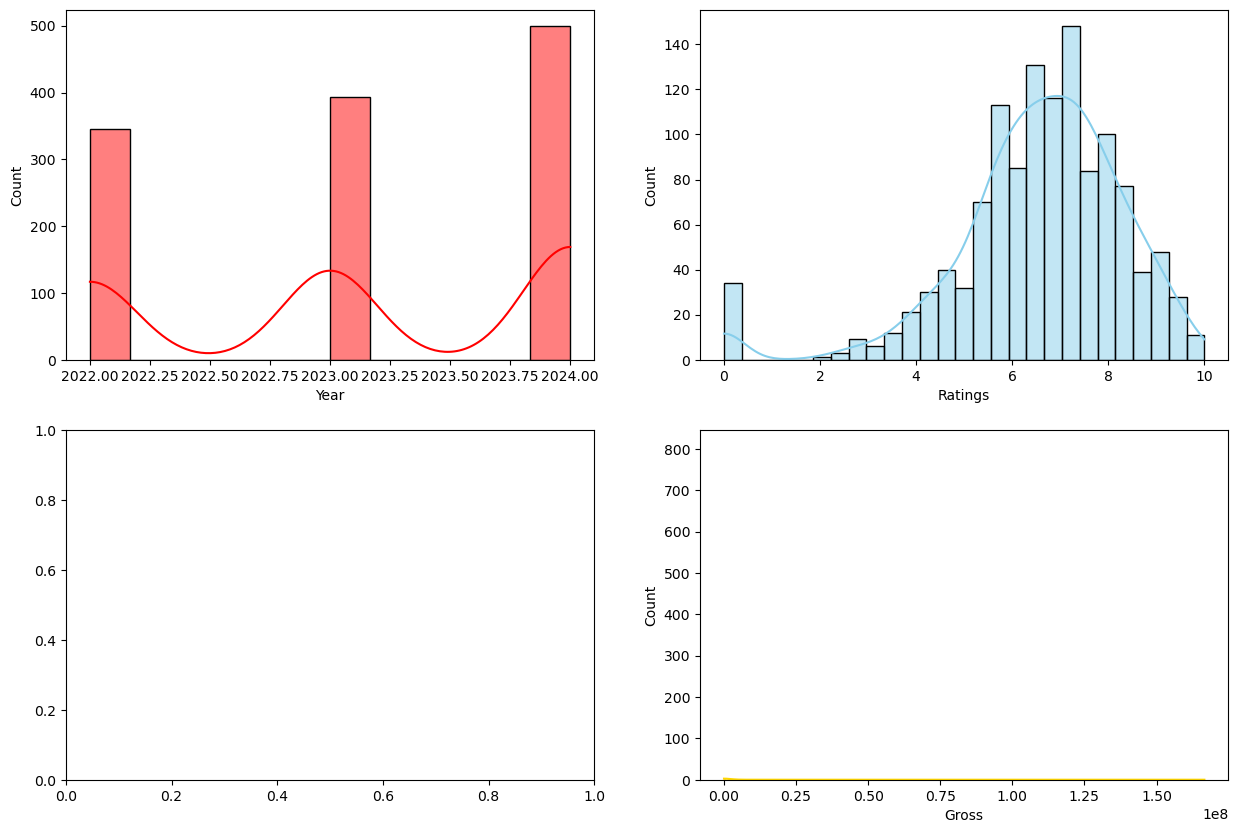

In [63]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= df, x="Year", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= df, x="Ratings", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= df, x="Gross", kde=True, color="gold", ax=axs[1,1])
plt.show()


<Axes: ylabel='Gross'>

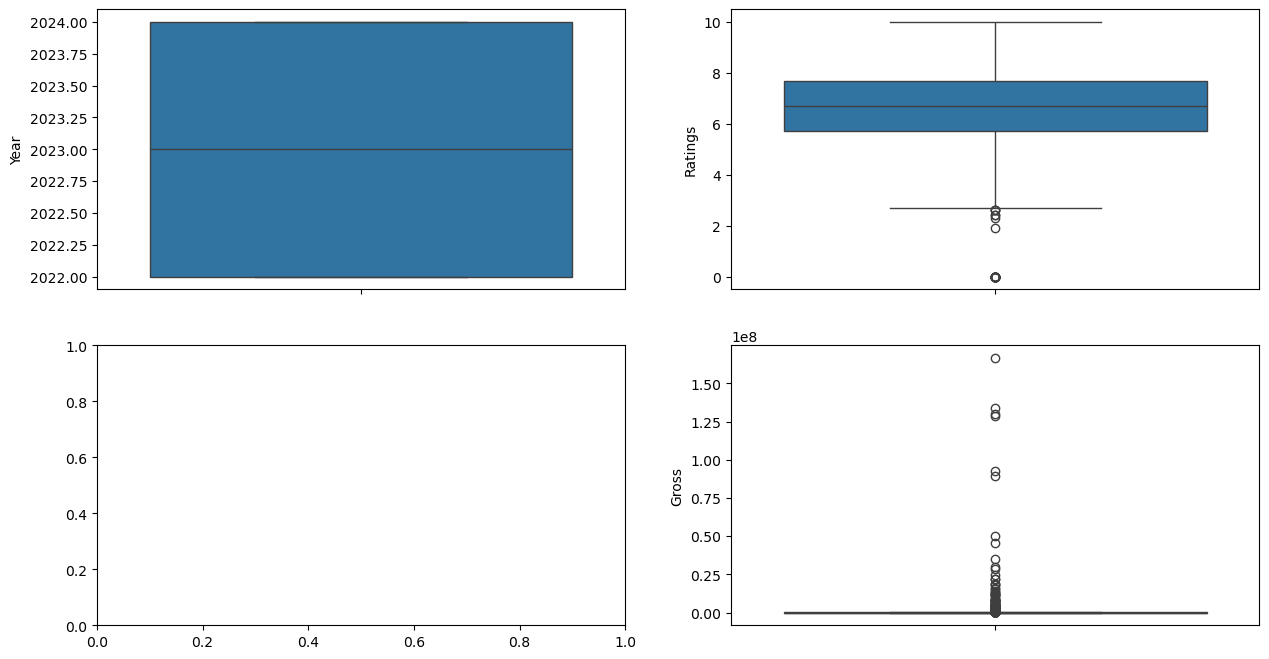

In [64]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(df['Year'], ax = axs[0,0])
sns.boxplot(df['Ratings'], ax = axs[0,1])
sns.boxplot(df['Gross'], ax = axs[1,1])

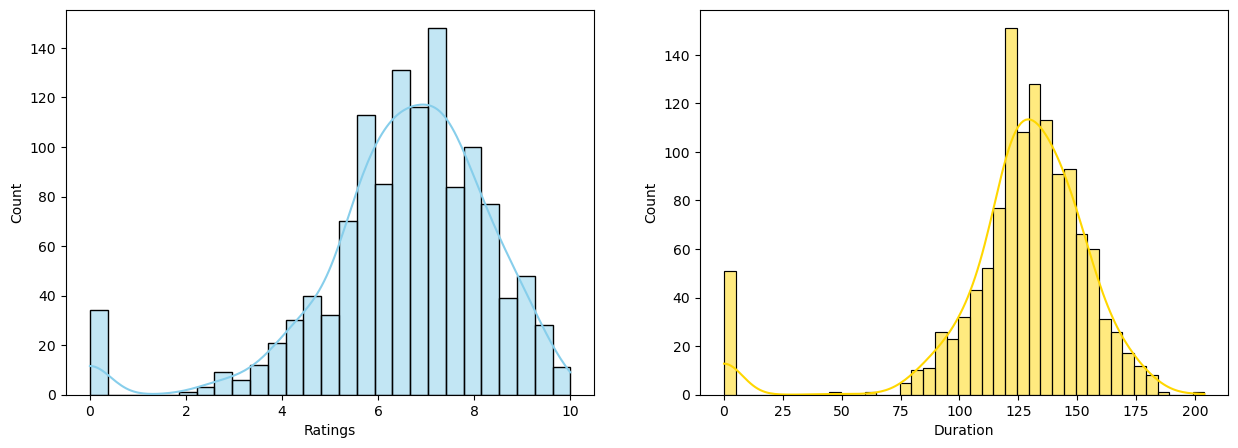

In [65]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data= df, x="Ratings", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= df, x="Duration", kde=True, color="gold", ax=axs[1])
plt.show()

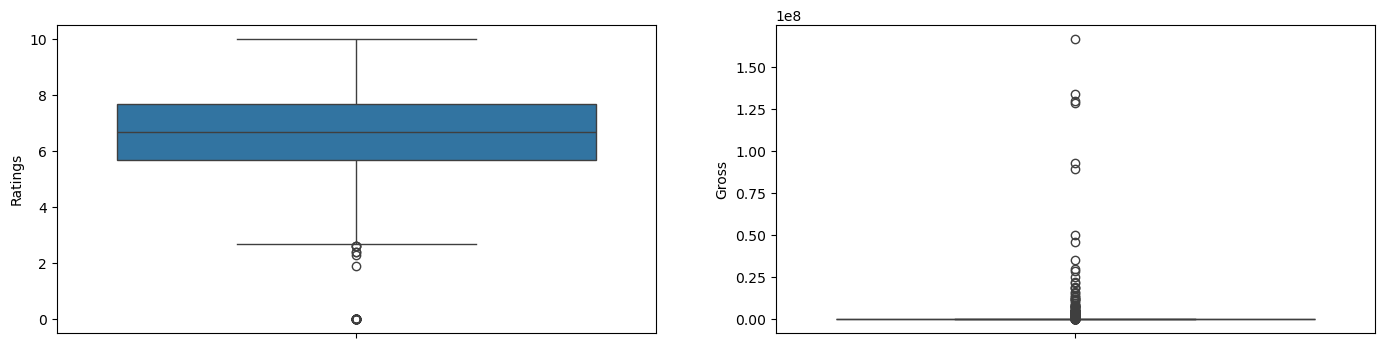

In [66]:
fig, axs = plt.subplots(1,2, figsize=(17, 4))

sns.boxplot(df['Ratings'], ax = axs[0])
#sns.boxplot(df['Reviews'], ax = axs[1])
sns.boxplot(df['Gross'], ax = axs[1])
plt.show()

In [67]:
df

Title  Year  Duration  Ratings  Reviews  \
0       Stree 2: Sarkate Ka Aatank  2024       147      7.3     Good   
1                    Devara Part 1  2024       176      6.4     Good   
2                            Ulajh  2024       150      6.4     Good   
3         Auron Mein Kahan Dum Tha  2024       150      7.3     Good   
4                     Dharmaveer 2  2024       130      7.5     Good   
...                            ...   ...       ...      ...      ...   
1233                         Tariq  2024       122      0.0  Average   
1234                  Missing Girl  2023       112      6.9     Good   
1235                         The Y  2023       110      5.3  Average   
1236   Upacharapoorvam Gunda Jayan  2022       129      5.7  Average   
1237  The Rise of Sudarshan Chakra  2023       156      7.8     Good   

           Language                                              Genre  \
0             Hindi                                    [Comedy Horror]   
1            Telugu                [Action Epic Action Drama Thriller]   
2             Hindi                                   [Drama Thriller]   
3             Hindi                       [Action Crime Drama Romance]   
4     Marathi Hindi                      [Biography Documentary Drama]   
...             ...                                                ...   
1233          Hindi                            [Action Drama Thriller]   
1234      Malayalam                                  [Horror Thriller]   
1235          Hindi  [Psychological Horror Psychological Thriller H...   
1236      Malayalam                              [Comedy Drama Family]   
1237          Hindi                                        [Biography]   

                                                   Plot          Director  \
0     After the events of Stree, the town of Chander...      Amar Kaushik   
1     An epic action saga set against coastal lands,...     Koratala Siva   
2     The journey of a young IFS officer, belonging ...   Sudhanshu Saria   
3     After 20 years in prison, a man reunites with ...     Neeraj Pandey   
4     Explores Anand Dighe's life, tracing his polit...      Pravin Tarde   
...                                                 ...               ...   
1233                        Add a plot in your language      Arun Gopalan   
1234  To create a ghost story to prevent his old bun...     Abdul Rasheed   
1235  The Female Protagonist is a Mute. After her ma...     Girideva Raaj   
1236  Former rowdy jayan is in a mission to conduct ...        Arun Vaiga   
1237  Film The Rise Of Sudarshan Chakra Is Based On ...  Anil Kulchainiya   

                                         Writer  \
0           Niren BhattKrishna D.K.Raj Nidimoru   
1                                 Koratala Siva   
2     Parveez SheikhSudhanshu SariaAtika Chohan   
3                                 Neeraj Pandey   
4                                  Pravin Tarde   
...                                         ...   
1233      Simaab HashmiLalit MaratheRitesh Shah   
1234            Afsal K AzizVishal Vishwanathan   
1235                              Girideva Raaj   
1236                               Rajesh Varma   
1237                           Anil Kulchainiya   

                                                 Actor    Gross  
0          Rajkummar RaoShraddha KapoorPankaj Tripathi  7388627  
1          N.T. Rama Rao Jr.Saif Ali KhanJanhvi Kapoor  7331058  
2            Janhvi KapoorRoshan MathewGulshan Devaiah    90346  
3                         Ajay DevgnTabuJimmy Shergill   144378  
4                Sunil BarveRajesh BhosleKshitish Date        0  
...                                                ...      ...  
1233                  John AbrahamRukmini MaitraGajala        0  
1234          Bhaskar ArvindAshika AshokanAfsal K Aziz        0  
1235                     Yuvan HariharanLeonillaApsara        0  
1236                Saiju KurupJohny AntonySiju Wilson        0  
1237  Vivek

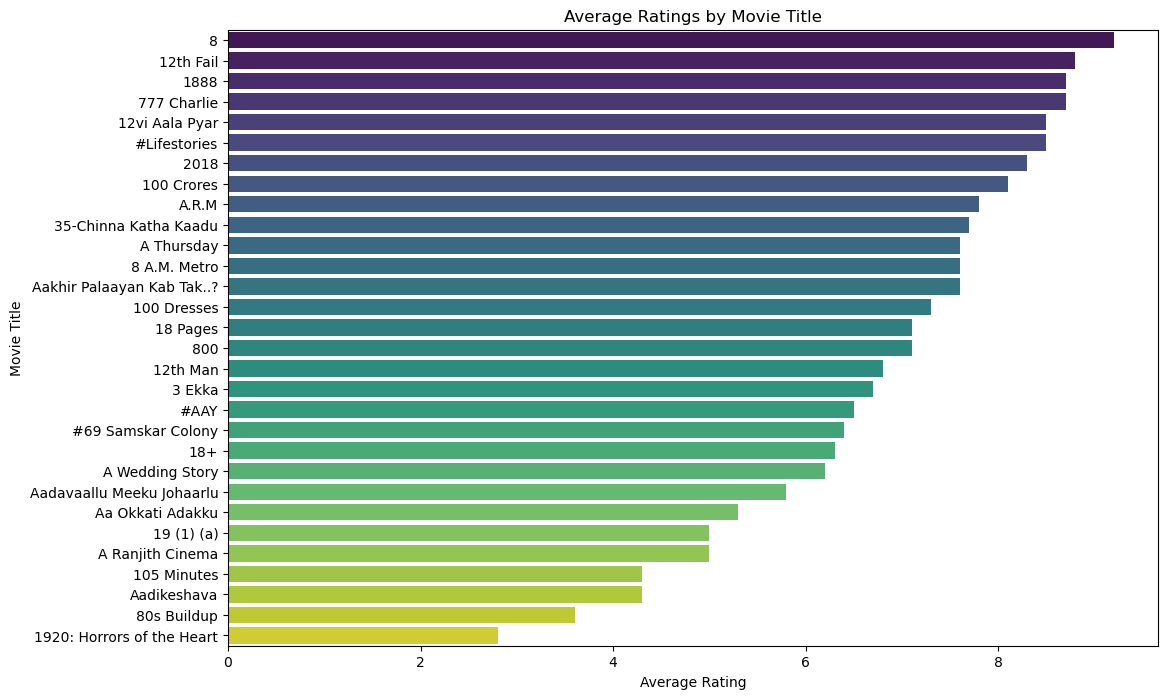

In [68]:
avg_rating = df.groupby('Title')['Ratings'].mean().reset_index().head(30)
# Sort by Ratings for better visualization
avg_rating_by_title = avg_rating.sort_values(by='Ratings', ascending=False)
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_rating_by_title, x='Ratings', y='Title', palette='viridis')
plt.title('Average Ratings by Movie Title')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

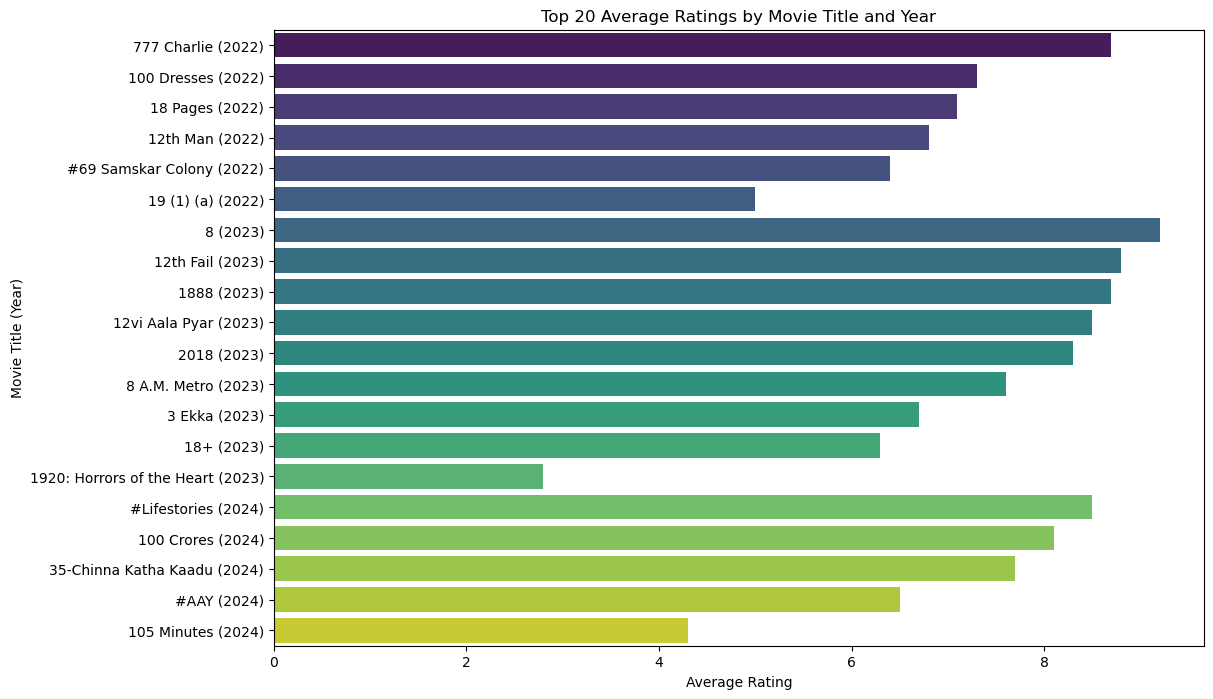

In [69]:
df[df['Ratings'] == 10]
avg_rating = df.groupby(['Title', 'Year'])['Ratings'].mean().reset_index().head(20)
# Sort by Ratings in descending order and select top 20
#avg_rating_by_title = avg_rating.sort_values(by='Ratings', ascending=[True,False])
avg_rating_by_title = avg_rating.sort_values(by=['Year', 'Ratings'], ascending=[True, False])

# Create a combined label for title and year for better visualization
avg_rating_by_title['Title Year'] = avg_rating_by_title['Title'] + ' (' + avg_rating_by_title['Year'].astype(str) + ')'
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_rating_by_title, x='Ratings', y='Title Year', palette='viridis')
plt.title('Top 20 Average Ratings by Movie Title and Year')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title (Year)')
plt.xticks()  # Rotate x-ticks if titles are long
plt.show()

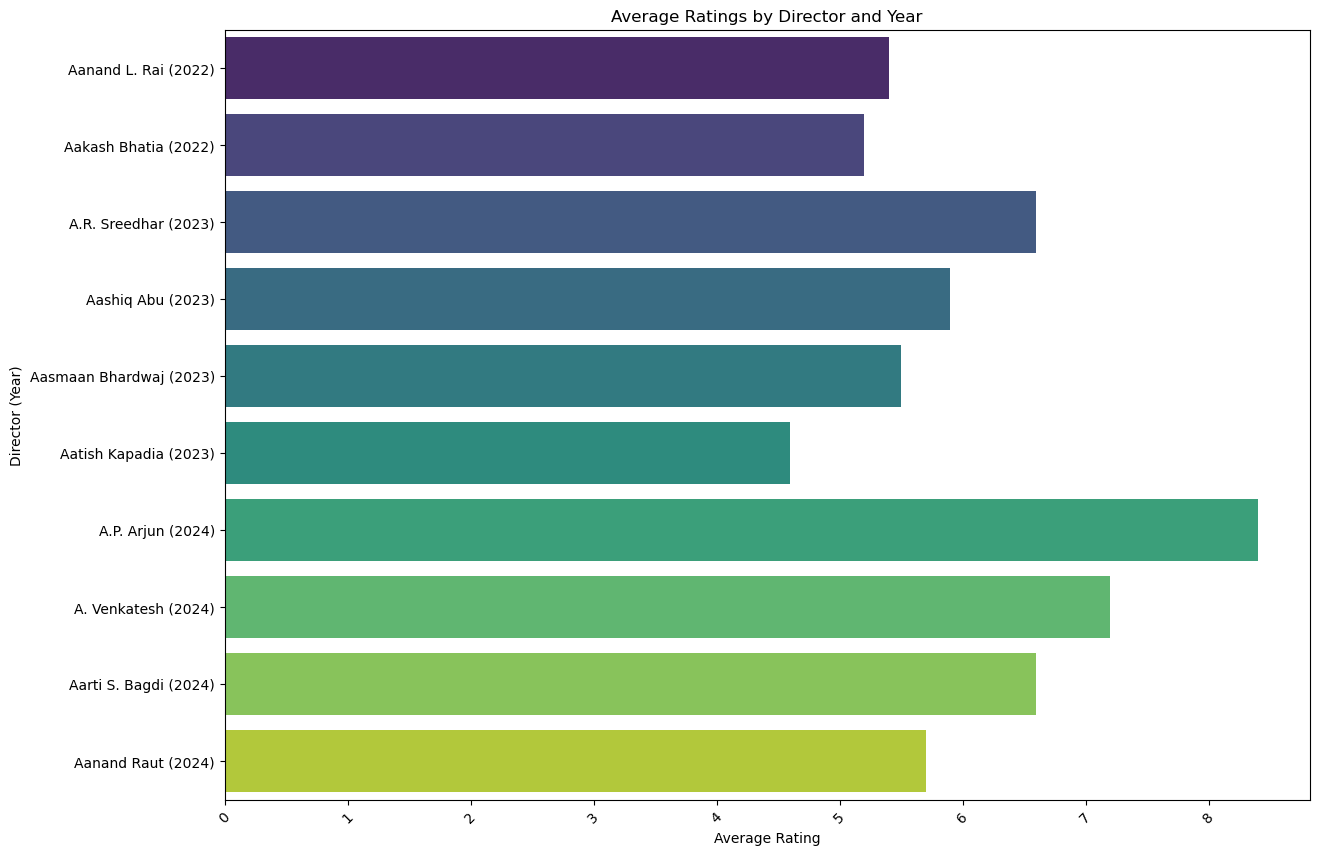

In [70]:
avg_rating = df.groupby(['Director', 'Year'])['Ratings'].mean().reset_index().head(10)

# Sort by Year and Ratings for better visualization
avg_rating_sorted = avg_rating.sort_values(by=['Year', 'Ratings'], ascending=[True, False])

# Create a combined label for director and year for better visualization
avg_rating_sorted['Director Year'] = avg_rating_sorted['Director'] + ' (' + avg_rating_sorted['Year'].astype(str) + ')'

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(data=avg_rating_sorted, x='Ratings', y='Director Year', palette='viridis')
plt.title('Average Ratings by Director and Year')
plt.xlabel('Average Rating')
plt.ylabel('Director (Year)')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.show()

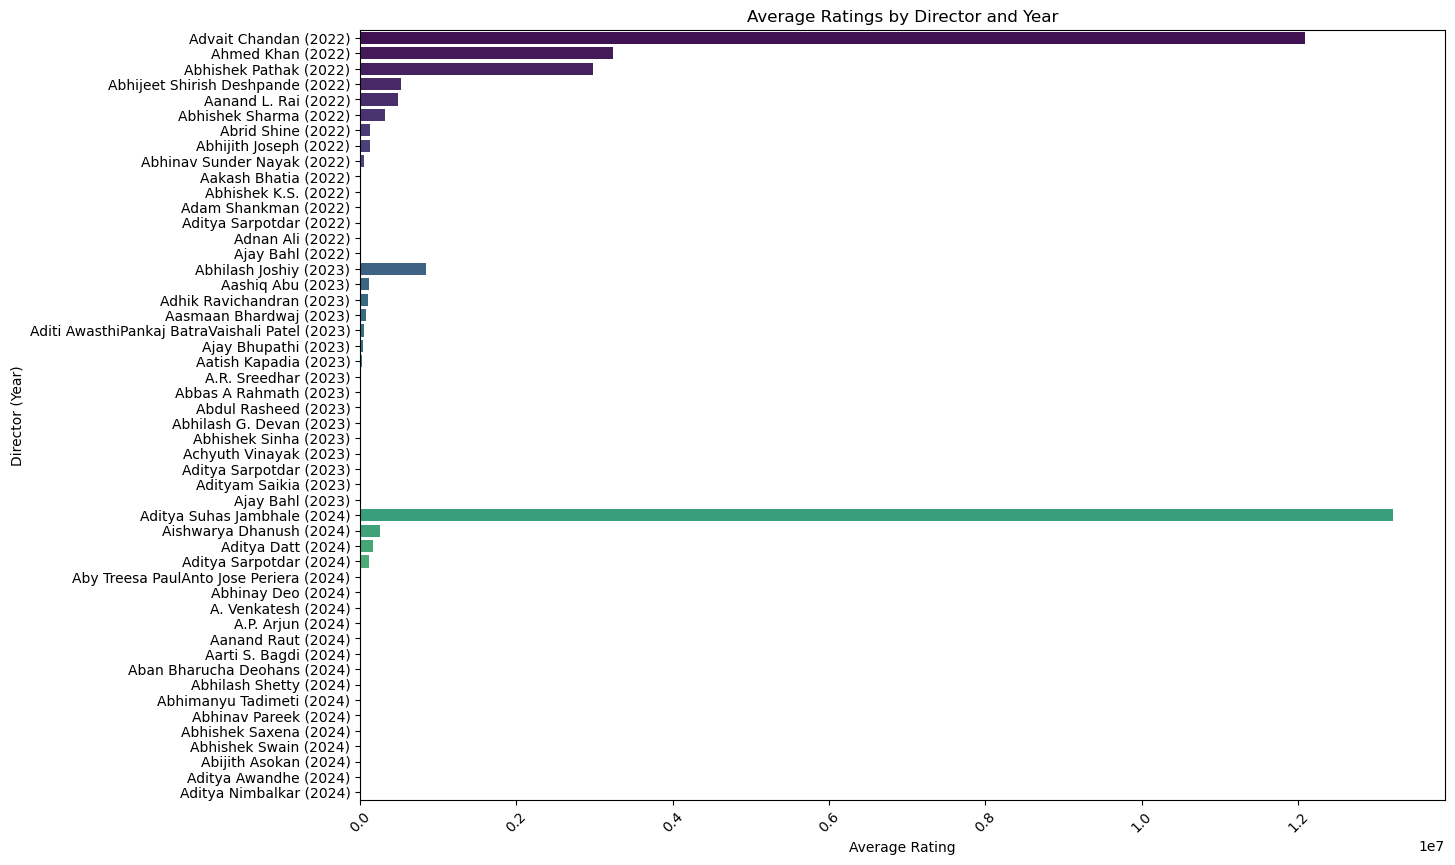

In [71]:
avg_rating = df.groupby(['Director', 'Year'])['Gross'].mean().reset_index().head(50)

# Sort by Year and Ratings for better visualization
avg_rating_sorted = avg_rating.sort_values(by=['Year', 'Gross'] ,ascending=[True, False])

# Create a combined label for director and year for better visualization
avg_rating_sorted['Director Year'] = avg_rating_sorted['Director'] + ' (' + avg_rating_sorted['Year'].astype(str) + ')'

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(data=avg_rating_sorted, x='Gross', y='Director Year', palette='viridis')
plt.title('Average Ratings by Director and Year')
plt.xlabel('Average Rating')
plt.ylabel('Director (Year)')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.show()

In [72]:
df_unique = df[['Director', 'Year', 'Ratings']],ascending=True.head(30)

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(data=df_unique, x='Ratings', y='Director', hue='Year', palette='viridis')

plt.title('Original Ratings by Director and Year')
plt.xlabel('Rating')
plt.ylabel('Director')
plt.legend(title='Year')
plt.xticks()  # Rotate x-ticks for better readability
plt.show()

AttributeError: 'bool' object has no attribute 'head'

In [ ]:
df_unique = df[['Director', 'Year', 'Ratings']].head(10)

# Sort by Year
df_unique = df_unique.sort_values(by='Year')

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(data=df_unique, x='Ratings', y='Director', hue='Year', palette='viridis', dodge=True)
plt.title('Original Ratings by Director and Year')
plt.xlabel('Rating')
plt.ylabel('Director')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside of the plot
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.show()

In [ ]:
df_unique = df[['Director', 'Year', 'Gross']].head(30)

# Sort by Year
df_unique = df_unique.sort_values(by='Year')

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(data=df_unique, x='Gross', y='Director', hue='Year', palette='viridis')
plt.title('Original Ratings by Director and Year')
plt.xlabel('Rating')
plt.ylabel('Director')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside of the plot
#plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.show()

In [ ]:
df

In [ ]:
Step 1: Groupby Analysis
You can group your data by categorical variables and compute statistics on continuous variables. Here are some possible combinations:

Director vs Ratings: Average ratings per director.
Year vs Gross: Total gross earnings per year.
Genre vs Ratings: Average ratings per genre.
Language vs Gross: Total gross earnings per language.
Director vs Gross: Total gross earnings per director.
Year vs Ratings: Average ratings per year.
Actor vs Gross: Total gross earnings per actor.
Director vs Duration: Average duration per director.
Genre vs Gross: Total gross earnings per genre.
Language vs Ratings: Average ratings per language.
Step 2: Pivot Table Analysis
Pivot tables can be useful for summarizing data. Here are some combinations:

Pivot Table for Ratings by Year and Genre:

Rows: Year
Columns: Genre
Values: Average Ratings
Pivot Table for Gross by Year and Director:

Rows: Year
Columns: Director
Values: Total Gross
Pivot Table for Average Duration by Language and Genre:

Rows: Language
Columns: Genre
Values: Average Duration
Pivot Table for Ratings by Language and Director:

Rows: Language
Columns: Director
Values: Average Ratings
Pivot Table for Gross by Genre and Year:

Rows: Genre
Columns: Year
Values: Total Gross
Pivot Table for Ratings by Actor and Genre:

Rows: Actor
Columns: Genre
Values: Average Ratings

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(figsize=(12, 10))
grouped = df.groupby("Title")
mean = pd.DataFrame(grouped["Ratings"].mean())
mean1 = mean.sort_values("Ratings", ascending=False).head(20)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Ratings"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')


axes.set_xlabel('Average Rating', fontsize=14)
axes.set_ylabel('Movie Title', fontsize=14)
axes.set_title('Top 20 Movies by Average Rating', fontsize=16, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()


In [ ]:
top_directors = df['Director'].value_counts().head(20)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

palette = sns.color_palette("viridis", len(top_directors))

sns.barplot(x=top_directors.values, y=top_directors.index, palette=palette)

plt.title('Top 20 Directors by Number of Movies', fontsize=18, weight='bold')
plt.xlabel('Number of Movies', fontsize=14, weight='bold')
plt.ylabel('Director', fontsize=14, weight='bold')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

top_directors

In [75]:
def separate_actors(actors):
    # Use regex to find sequences that start with an uppercase letter followed by lowercase letters
    separated_actors = re.findall(r'[A-Z][a-z]+\s?[a-z]\s?[A-Z]?[a-z]', actors)
    if separated_actors:
        return ' '.join(separated_actors)  # Join the separated actors into a space-separated string
    else:
        return np.nan  # Return NaN if no valid actors are found

# Assume you have a DataFrame 'imdb_movies_data' with a column 'Actor'
df['Actor'] = df['Actor'].apply(separate_actors)

TypeError: expected string or bytes-like object, got 'float'